In [ ]:
pip install requests pandas tqdm

## 전체 분석 코드 (EDA)

In [ ]:
# 구글 코랩을 위한 한글 폰트 설정
!pip install -q koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import matplotlib.font_manager as fm
import warnings
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 경고 무시
warnings.filterwarnings('ignore')

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

## 서울시 국공립 초중고 공기 오염도

In [ ]:
import pandas as pd
import numpy as np

서울시_국공립_학교기본정보 = pd.read_csv('서울시_국공립_학교기본정보.csv',encoding='utf-8-sig')
서울시_국공립_초중고_환경위생관리현황 = pd.read_csv('/content/서울특별시_국공립_초중고_환경위생관리현황.csv',encoding='utf-8-sig')

In [ ]:
공기요소 = [
    "MNUT_DST_STB_YN",
    "MNUT_DST_RSLT_NMVL",
    "MNUT_DST_RSLT_NMVL_2",
    "MNUT_DST_RSLT_NMVL_3",
    "MNUT_DST_STB_YN_RSN",
    "GMNSM_MNUT_DST_STB_YN",
    "GMNSM_MNUT_DST_RSLT_NMVL",
    "GMNSM_MNUT_DST_RSLT_NMVL_2",
    "GMNSM_MNUT_DST_RSLT_NMVL_3",
    "GMNSM_MNUT_DST_STB_YN_RSN",
    "ULTRA_DST_STB_YN",
    "ULTRA_DST_RSLT_NMVL",
    "ULTRA_DST_RSLT_NMVL_2",
    "ULTRA_DST_RSLT_NMVL_3",
    "ULTRA_DST_STB_YN_RSN",
    "CO2_STB_YN",
    "CO2_RSLT_NMVL",
    "CO2_RSLT_NMVL_2",
    "CO2_RSLT_NMVL_3",
    "CO2_STB_YN_RSN",
    "CO_STB_YN",
    "CO_RSLT_NMVL",
    "CO_RSLT_NMVL_2",
    "CO_RSLT_NMVL_3",
    "CO_STB_YN_RSN",
    "NO2_STB_YN",
    "NO2_RSLT_NMVL",
    "NO2_RSLT_NMVL_2",
    "NO2_RSLT_NMVL_3",
    "NO2_STB_YN_RSN",
    'O3_STB_YN','O3_RSLT_NMVL','O3_RSLT_NMVL_2','O3_RSLT_NMVL_3','O3_STB_YN_RSN'
]

### 데이터 확인

In [ ]:
서울시_국공립_학교기본정보['SCHUL_CODE']

,SCHUL_CODE
0,S010000737
1,S010000738
2,S010000739
3,S010000741
4,S010000742
...,...
965,S010005583
966,S010005591
967,S010006381
968,S010006382


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[(서울시_국공립_초중고_환경위생관리현황['연도']==2022)&(서울시_국공립_초중고_환경위생관리현황['SEM_STR']=='상반기')]['SCHUL_CODE']

,SCHUL_CODE
0,S000003511
2,S000003563
4,S010000738
6,S010000741
8,S010000742
...,...
1917,S010005582
1919,S010005583
1921,S010005591
1923,S010006381


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[(서울시_국공립_초중고_환경위생관리현황['연도']==2022)&(서울시_국공립_초중고_환경위생관리현황['SEM_STR']=='상반기')]

,CO_STB_YN,FOND_SC_CODE,SEM,NO2_STB_YN,ETHY_BENZENE_STB_YN,BENZENE_STB_YN,XYLENE_STB_YN,ITENI_RSLT_NMVL,RN_RSLT_NMVL,NAT_VNTLA_STB_YN,...,UGWTR_STB_YN_RSN,ITENI_STB_YN_RSN,NSE_STB_YN_RSN,DES_ITENI_STB_YN_RSN,BLKB_ITENI_STB_YN_RSN,PBAN_EXCP_RSN,NAT_VNTLA_STB_YN_RSN,연도,학교급코드,HS_KND_SC_NM
0,해당없음,국립,2.0,해당없음,해당없음,해당없음,해당없음,1.00,49.0,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
2,적합,국립,2.0,적합,적합,적합,적합,1.10,19.0,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
4,적합,공립,2.0,적합,해당없음,해당없음,해당없음,1.40,NaN,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
6,적합,공립,2.0,적합,적합,적합,적합,1.90,81.6,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
8,적합,공립,2.0,적합,미실시,미실시,미실시,1.30,18.2,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,적합,공립,2.0,적합,적합,적합,적합,1.07,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교
1919,적합,공립,2.0,적합,적합,적합,적합,1.60,44.2,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교
1921,적합,공립,2.0,적합,적합,적합,적합,1.39,NaN,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교
1923,적합,공립,2.0,적합,해당없음,해당없음,해당없음,1.33,110.5,실시,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[(서울시_국공립_초중고_환경위생관리현황['연도']==2022)&(서울시_국공립_초중고_환경위생관리현황['SEM_STR']=='하반기')]

,CO_STB_YN,FOND_SC_CODE,SEM,NO2_STB_YN,ETHY_BENZENE_STB_YN,BENZENE_STB_YN,XYLENE_STB_YN,ITENI_RSLT_NMVL,RN_RSLT_NMVL,NAT_VNTLA_STB_YN,...,UGWTR_STB_YN_RSN,ITENI_STB_YN_RSN,NSE_STB_YN_RSN,DES_ITENI_STB_YN_RSN,BLKB_ITENI_STB_YN_RSN,PBAN_EXCP_RSN,NAT_VNTLA_STB_YN_RSN,연도,학교급코드,HS_KND_SC_NM
1,적합,국립,1.0,적합,적합,적합,적합,NaN,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
3,적합,국립,1.0,적합,적합,적합,적합,NaN,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
5,적합,공립,1.0,적합,해당없음,해당없음,해당없음,NaN,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
7,적합,공립,1.0,적합,적합,적합,적합,NaN,93.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
9,적합,공립,1.0,적합,해당없음,해당없음,해당없음,NaN,27.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,적합,공립,1.0,적합,적합,적합,적합,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교
1922,적합,공립,1.0,적합,적합,적합,적합,NaN,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교
1924,적합,공립,1.0,적합,해당없음,해당없음,해당없음,NaN,110.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교
1926,적합,공립,1.0,적합,해당없음,해당없음,해당없음,NaN,34.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,일반고등학교


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[서울시_국공립_초중고_환경위생관리현황['연도']==2022,공기요소].describe()

,MNUT_DST_RSLT_NMVL,MNUT_DST_RSLT_NMVL_2,MNUT_DST_RSLT_NMVL_3,GMNSM_MNUT_DST_RSLT_NMVL,GMNSM_MNUT_DST_RSLT_NMVL_2,GMNSM_MNUT_DST_RSLT_NMVL_3,ULTRA_DST_RSLT_NMVL,ULTRA_DST_RSLT_NMVL_2,ULTRA_DST_RSLT_NMVL_3,CO2_RSLT_NMVL,...,CO2_RSLT_NMVL_3,CO_RSLT_NMVL,CO_RSLT_NMVL_2,CO_RSLT_NMVL_3,NO2_RSLT_NMVL,NO2_RSLT_NMVL_2,NO2_RSLT_NMVL_3,O3_RSLT_NMVL,O3_RSLT_NMVL_2,O3_RSLT_NMVL_3
count,1867.000000,404.000000,352.000000,1763.000000,285.000000,158.000000,1863.000000,399.000000,349.000000,1861.000000,...,353.000000,1710.000000,315.000000,270.000000,1714.000000,315.000000,272.000000,1860.000000,374.000000,326.00000
mean,39.728923,41.159084,37.552557,47.813261,47.183333,43.222785,15.852555,15.673383,14.629226,756.484562,...,703.466431,0.885105,0.747873,0.745296,0.015763,0.015272,0.014327,0.014922,0.013833,0.01385
std,18.325029,19.193256,18.399153,28.769513,30.397173,30.304421,8.092070,8.044351,7.477276,156.235088,...,162.766274,0.964345,0.551033,0.579856,0.009728,0.010690,0.008668,0.010542,0.009554,0.00968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24.700000,24.325000,22.300000,24.000000,22.500000,19.400000,9.400000,9.050000,8.800000,674.000000,...,604.000000,0.400000,0.400000,0.400000,0.010000,0.010000,0.010000,0.010000,0.010000,0.01000
50%,38.800000,40.900000,35.900000,42.800000,40.800000,36.000000,14.800000,14.600000,13.200000,777.000000,...,714.000000,0.700000,0.600000,0.600000,0.010000,0.013000,0.012000,0.010000,0.013000,0.01000
75%,54.550000,57.650000,51.825000,66.900000,66.800000,58.775000,21.600000,21.000000,20.100000,864.000000,...,824.000000,1.000000,1.000000,1.000000,0.020000,0.020000,0.019250,0.020000,0.020000,0.02000
max,87.400000,80.000000,75.000000,150.000000,149.000000,149.000000,55.000000,38.000000,35.000000,1528.700000,...,1000.000000,10.000000,6.000000,7.000000,0.050000,0.123000,0.048000,0.060000,0.060000,0.06000


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[서울시_국공립_초중고_환경위생관리현황['MNUT_DST_RSLT_NMVL']>50,'MNUT_DST_RSLT_NMVL']

,MNUT_DST_RSLT_NMVL
3,63.6
6,68.6
8,71.6
14,75.0
15,74.6
...,...
3819,69.2
3828,53.6
3834,70.6
3840,60.6


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[서울시_국공립_초중고_환경위생관리현황['MNUT_DST_RSLT_NMVL_2']>50,'MNUT_DST_RSLT_NMVL']

,MNUT_DST_RSLT_NMVL
8,71.6
14,75.0
47,52.8
49,62.2
73,38.2
...,...
3763,34.2
3768,36.1
3770,68.8
3771,34.0


In [ ]:
서울시_국공립_초중고_환경위생관리현황.loc[서울시_국공립_초중고_환경위생관리현황['MNUT_DST_RSLT_NMVL_3']>50,'MNUT_DST_RSLT_NMVL']

,MNUT_DST_RSLT_NMVL
8,71.6
14,75.0
49,62.2
73,38.2
101,52.9
...,...
3762,34.2
3763,34.2
3770,68.8
3790,61.0


In [ ]:
#NO2_STB_YN
100*len(서울시_국공립_초중고_환경위생관리현황[서울시_국공립_초중고_환경위생관리현황['O3_STB_YN']=='부적합'])/len(서울시_국공립_초중고_환경위생관리현황)

0.07772020725388601

### 단계별 위험수준 평가 (학교 내부 측정치)

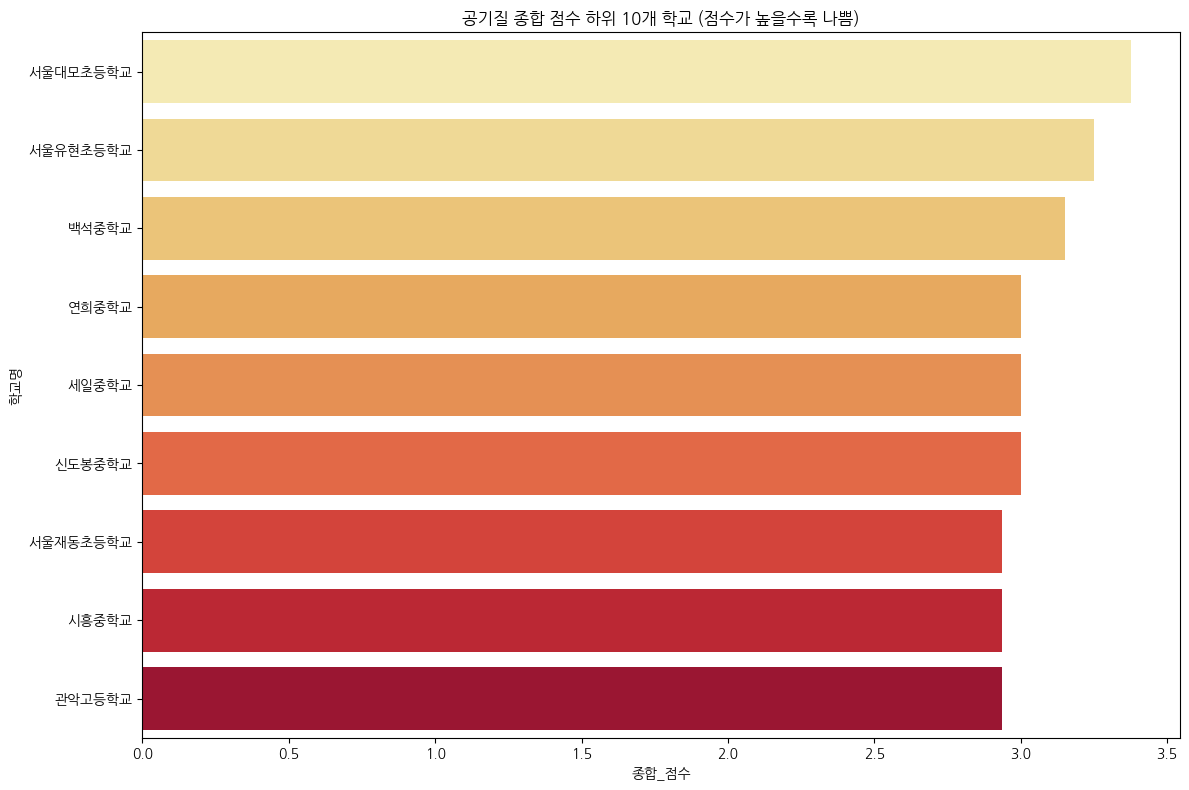

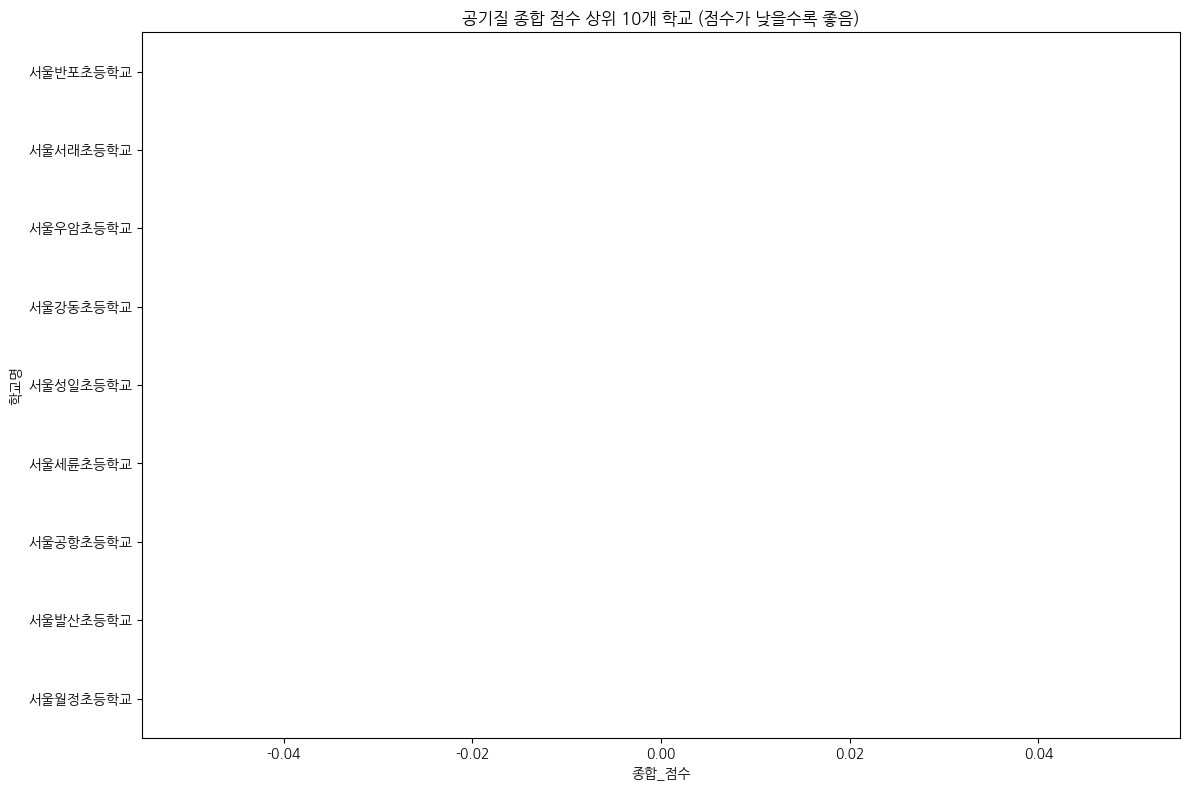

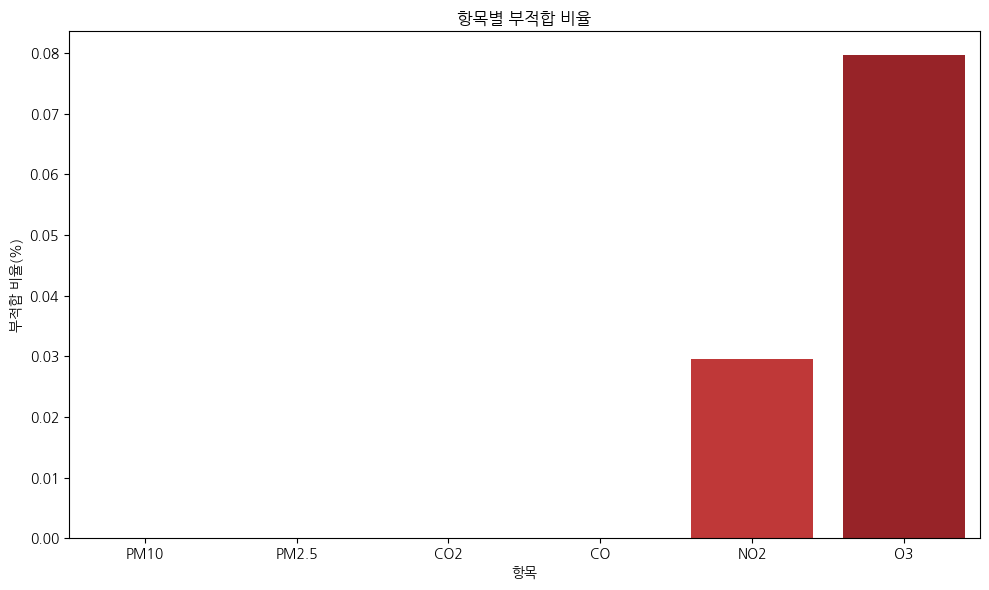

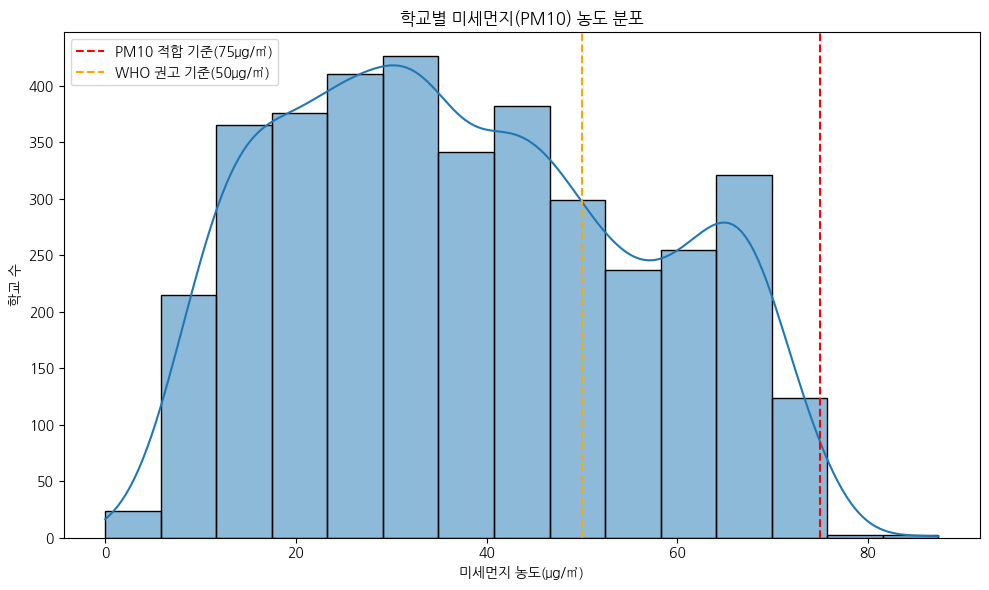

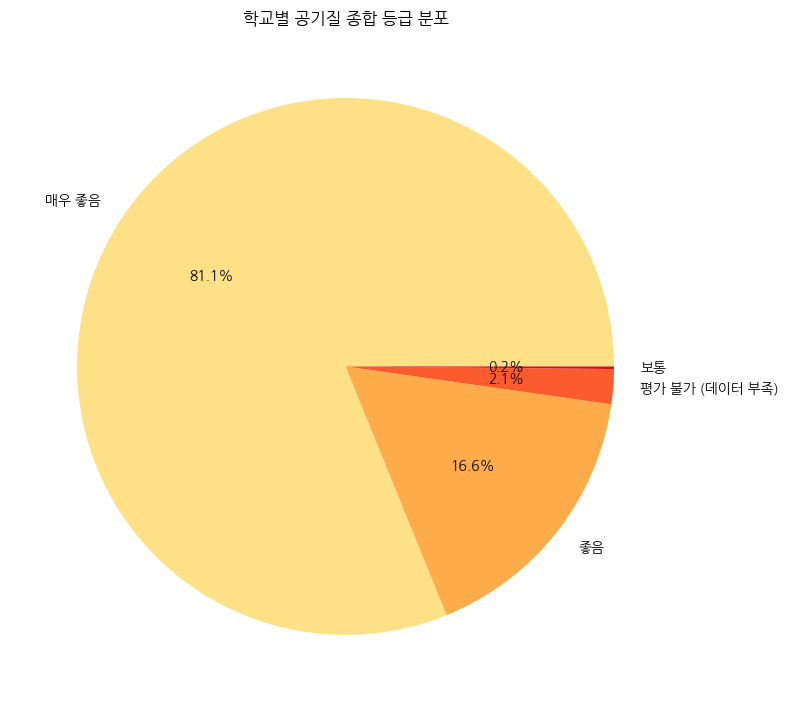

분석 완료. 총 3860개 학교의 공기질 평가 결과가 저장되었습니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 함수: 미세먼지(PM10) 단계 평가
def evaluate_pm10(value):
    if pd.isna(value) or value == "":
        return "데이터 없음", 0

    value = float(value)
    if value <= 30:
        return "좋음", 1
    elif value <= 50:
        return "보통(민감군 안전)", 2
    elif value <= 65:
        return "보통(민감군 주의)", 3
    elif value <= 75:
        return "보통(모두 주의)", 4
    elif value <= 150:
        return "나쁨", 5
    else:
        return "매우 나쁨", 6

# 함수: 초미세먼지(PM2.5) 단계 평가
def evaluate_pm25(value):
    if pd.isna(value) or value == "":
        return "데이터 없음", 0

    value = float(value)
    if value <= 15:
        return "좋음", 1
    elif value <= 25:
        return "보통(민감군 안전)", 2
    elif value <= 35:
        return "보통(민감군 주의)", 3
    elif value <= 50:
        return "나쁨", 4
    elif value <= 75:
        return "매우 나쁨", 5
    else:
        return "위험", 6

# 함수: 이산화탄소(CO2) 단계 평가
def evaluate_co2(value):
    if pd.isna(value) or value == "":
        return "데이터 없음", 0

    value = float(value)
    if value <= 700:
        return "좋음", 1
    elif value <= 1000:
        return "보통", 2
    elif value <= 1500:
        return "주의", 3
    else:
        return "나쁨", 4

# 함수: 일산화탄소(CO) 단계 평가
def evaluate_co(value):
    if pd.isna(value) or value == "":
        return "데이터 없음", 0

    value = float(value)
    if value <= 2:
        return "좋음", 1
    elif value <= 5:
        return "보통", 2
    elif value <= 10:
        return "주의", 3
    else:
        return "나쁨", 4

# 함수: 이산화질소(NO2) 단계 평가
def evaluate_no2(value):
    if pd.isna(value) or value == "":
        return "데이터 없음", 0

    value = float(value)
    if value <= 0.03:
        return "좋음", 1
    elif value <= 0.05:
        return "보통", 2
    elif value <= 0.1:
        return "주의", 3
    else:
        return "나쁨", 4

# 함수: 오존(O3) 단계 평가
def evaluate_o3(value):
    if pd.isna(value) or value == "":
        return "데이터 없음", 0

    value = float(value)
    if value <= 0.03:
        return "좋음", 1
    elif value <= 0.06:
        return "보통", 2
    elif value <= 0.1:
        return "주의", 3
    else:
        return "나쁨", 4

# 함수: 적합성 여부(Y/N) 평가
def evaluate_suitability(yn_value):
    if pd.isna(yn_value) or yn_value == "" or yn_value =="해당없음" or yn_value =='미실시':
        return "데이터 없음", 0
    elif yn_value == '적합':
        return "적합", 1
    else:
        return "부적합", 2

# 함수: 다중 측정값 처리 (최대값 또는 평균값 사용)
def process_multiple_values(row, base_col, use_max=True):
    cols = [f"{base_col}", f"{base_col}_2", f"{base_col}_3"]
    values = []

    for col in cols:
        if col in row and not pd.isna(row[col]) and row[col] != "":
            try:
                values.append(float(row[col]))
            except (ValueError, TypeError):
                pass

    if len(values) == 0:
        return None

    if use_max:
        return max(values)  # 최대값 사용 (보수적 접근)
    else:
        return sum(values) / len(values)  # 평균값 사용

# 함수: 통합 공기질 평가
def evaluate_air_quality(df):
    # 결과를 저장할 DataFrame 생성
    results = pd.DataFrame()
    results['학교명'] = df['SCHUL_NM'] if 'SCHUL_NM' in df.columns else df.index
    results['학교코드'] = df['SCHUL_CODE'] if 'SCHUL_CODE' in df.columns else df.index

    # 미세먼지(PM10) - 교실 평가
    results['PM10_교실_최대값'] = df.apply(lambda row: process_multiple_values(row, 'MNUT_DST_RSLT_NMVL', True), axis=1)
    results['PM10_교실_단계'] = results['PM10_교실_최대값'].apply(lambda x: evaluate_pm10(x)[0])
    results['PM10_교실_점수'] = results['PM10_교실_최대값'].apply(lambda x: evaluate_pm10(x)[1])
    results['PM10_교실_적합성'] = df['MNUT_DST_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 미세먼지(PM10) - 체육관 평가
    results['PM10_체육관_최대값'] = df.apply(lambda row: process_multiple_values(row, 'GMNSM_MNUT_DST_RSLT_NMVL', True), axis=1)
    results['PM10_체육관_단계'] = results['PM10_체육관_최대값'].apply(lambda x: evaluate_pm10(x)[0] if x is not None else "데이터 없음")
    results['PM10_체육관_점수'] = results['PM10_체육관_최대값'].apply(lambda x: evaluate_pm10(x)[1] if x is not None else 0)
    results['PM10_체육관_적합성'] = df['GMNSM_MNUT_DST_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 초미세먼지(PM2.5) 평가
    results['PM2.5_최대값'] = df.apply(lambda row: process_multiple_values(row, 'ULTRA_DST_RSLT_NMVL', True), axis=1)
    results['PM2.5_단계'] = results['PM2.5_최대값'].apply(lambda x: evaluate_pm25(x)[0] if x is not None else "데이터 없음")
    results['PM2.5_점수'] = results['PM2.5_최대값'].apply(lambda x: evaluate_pm25(x)[1] if x is not None else 0)
    results['PM2.5_적합성'] = df['ULTRA_DST_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 이산화탄소(CO2) 평가
    results['CO2_최대값'] = df.apply(lambda row: process_multiple_values(row, 'CO2_RSLT_NMVL', True), axis=1)
    results['CO2_단계'] = results['CO2_최대값'].apply(lambda x: evaluate_co2(x)[0] if x is not None else "데이터 없음")
    results['CO2_점수'] = results['CO2_최대값'].apply(lambda x: evaluate_co2(x)[1] if x is not None else 0)
    results['CO2_적합성'] = df['CO2_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 일산화탄소(CO) 평가
    results['CO_최대값'] = df.apply(lambda row: process_multiple_values(row, 'CO_RSLT_NMVL', True), axis=1)
    results['CO_단계'] = results['CO_최대값'].apply(lambda x: evaluate_co(x)[0] if x is not None else "데이터 없음")
    results['CO_점수'] = results['CO_최대값'].apply(lambda x: evaluate_co(x)[1] if x is not None else 0)
    results['CO_적합성'] = df['CO_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 이산화질소(NO2) 평가
    results['NO2_최대값'] = df.apply(lambda row: process_multiple_values(row, 'NO2_RSLT_NMVL', True), axis=1)
    results['NO2_단계'] = results['NO2_최대값'].apply(lambda x: evaluate_no2(x)[0] if x is not None else "데이터 없음")
    results['NO2_점수'] = results['NO2_최대값'].apply(lambda x: evaluate_no2(x)[1] if x is not None else 0)
    results['NO2_적합성'] = df['NO2_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 오존(O3) 평가
    results['O3_최대값'] = df.apply(lambda row: process_multiple_values(row, 'O3_RSLT_NMVL', True), axis=1)
    results['O3_단계'] = results['O3_최대값'].apply(lambda x: evaluate_o3(x)[0] if x is not None else "데이터 없음")
    results['O3_점수'] = results['O3_최대값'].apply(lambda x: evaluate_o3(x)[1] if x is not None else 0)
    results['O3_적합성'] = df['O3_STB_YN'].apply(lambda x: evaluate_suitability(x)[0])

    # 종합 평가 (가중 평균 점수)
    # 미세먼지와 초미세먼지에 더 높은 가중치 부여
    weights = {
        'PM10_교실_점수': 0.25,
        'PM2.5_점수': 0.25,
        'CO2_점수': 0.15,
        'CO_점수': 0.1,
        'NO2_점수': 0.1,
        'O3_점수': 0.15
    }

    # 가중 평균 계산
    score_columns = ['PM10_교실_점수', 'PM2.5_점수', 'CO2_점수', 'CO_점수', 'NO2_점수', 'O3_점수']
    results['데이터_존재_항목수'] = results[score_columns].apply(lambda x: sum(x > 0), axis=1)

    # 최소 3개 이상의 데이터가 있는 경우에만 종합 점수 계산
    results['종합_점수'] = 0

    for idx, row in results.iterrows():
        if row['데이터_존재_항목수'] >= 3:
            weighted_sum = 0
            weight_sum = 0

            for col, weight in weights.items():
                if row[col] > 0:
                    weighted_sum += row[col] * weight
                    weight_sum += weight

            if weight_sum > 0:
                results.at[idx, '종합_점수'] = weighted_sum / weight_sum

    # 종합 등급 평가
    def get_overall_grade(score):
        if score == 0:
            return "평가 불가 (데이터 부족)"
        elif score < 2:
            return "매우 좋음"
        elif score < 3:
            return "좋음"
        elif score < 4:
            return "보통"
        elif score < 5:
            return "주의 필요"
        else:
            return "위험"

    results['종합_등급'] = results['종합_점수'].apply(get_overall_grade)

    # 부적합 항목 집계
    unsuitable_columns = ['PM10_교실_적합성', 'PM10_체육관_적합성', 'PM2.5_적합성',
                          'CO2_적합성', 'CO_적합성', 'NO2_적합성', 'O3_적합성']

    results['부적합_항목수'] = results[unsuitable_columns].apply(
        lambda x: sum(x == "부적합"), axis=1)

    return results

# 결과 시각화 함수
def visualize_results(results, top_n=10):
    # 1. 각 학교별 종합 점수 상위/하위 학교 시각화
    plt.figure(figsize=(12, 8))

    # 상위 학교 (점수가 낮을수록 좋음)
    top_schools = results.nlargest(top_n, '종합_점수')
    sns.barplot(x='종합_점수', y='학교명', data=top_schools, palette='YlOrRd')
    plt.title(f'공기질 종합 점수 하위 {top_n}개 학교 (점수가 높을수록 나쁨)')
    plt.tight_layout()
    plt.show()

    # 하위 학교 (점수가 낮을수록 좋음)
    bottom_schools = results.nsmallest(top_n, '종합_점수')
    sns.barplot(x='종합_점수', y='학교명', data=bottom_schools, palette='YlGnBu')
    plt.title(f'공기질 종합 점수 상위 {top_n}개 학교 (점수가 낮을수록 좋음)')
    plt.tight_layout()
    plt.show()

    # 2. 항목별 부적합 비율 시각화
    unsuitable_columns = ['PM10_교실_적합성', 'PM10_체육관_적합성', 'PM2.5_적합성',
                         'CO2_적합성', 'CO_적합성', 'NO2_적합성', 'O3_적합성']

    unsuitable_counts = []
    for col in unsuitable_columns:
        count = sum(results[col] == "부적합")
        total = sum((results[col] == "부적합") | (results[col] == "적합"))
        if total > 0:
            percentage = (count / total) * 100
        else:
            percentage = 0
        unsuitable_counts.append({'항목': col.split('_')[0], '부적합 비율(%)': percentage})

    unsuitable_df = pd.DataFrame(unsuitable_counts)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='항목', y='부적합 비율(%)', data=unsuitable_df, palette='Reds')
    plt.title('항목별 부적합 비율')
    plt.tight_layout()
    plt.show()

    # 3. 미세먼지(PM10) 분포 히스토그램
    plt.figure(figsize=(10, 6))
    sns.histplot(results['PM10_교실_최대값'].dropna(), bins=15, kde=True)
    plt.axvline(x=75, color='red', linestyle='--', label='PM10 적합 기준(75μg/㎥)')
    plt.axvline(x=50, color='orange', linestyle='--', label='WHO 권고 기준(50μg/㎥)')
    plt.title('학교별 미세먼지(PM10) 농도 분포')
    plt.xlabel('미세먼지 농도(μg/㎥)')
    plt.ylabel('학교 수')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 4. 종합 등급 분포 파이 차트
    plt.figure(figsize=(8, 8))
    grade_counts = results['종합_등급'].value_counts()
    plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('YlOrRd', len(grade_counts)))
    plt.title('학교별 공기질 종합 등급 분포')
    plt.tight_layout()
    plt.show()

# 학교별 권고사항 생성 함수
def generate_recommendations(results):
    recommendations = []

    for idx, row in results.iterrows():
        school_name = row['학교명']
        rec = {'학교명': school_name, '권고사항': []}

        # PM10 교실 권고사항
        if not pd.isna(row['PM10_교실_최대값']):
            pm10 = float(row['PM10_교실_최대값'])
            if pm10 > 75:
                rec['권고사항'].append(f"교실 미세먼지(PM10)가 {pm10:.1f}μg/㎥로 기준치(75μg/㎥)를 초과함. 실외활동 제한 및 공기청정기 가동 필요")
            elif pm10 > 65:
                rec['권고사항'].append(f"교실 미세먼지(PM10)가 {pm10:.1f}μg/㎥로 주의 수준. 호흡기 질환자 실외활동 제한 권고")
            elif pm10 > 50:
                rec['권고사항'].append(f"교실 미세먼지(PM10)가 {pm10:.1f}μg/㎥로 민감군 주의 필요. 천식 등 민감군 학생 모니터링")

        # PM2.5 권고사항
        if not pd.isna(row['PM2.5_최대값']):
            pm25 = float(row['PM2.5_최대값'])
            if pm25 > 35:
                rec['권고사항'].append(f"초미세먼지(PM2.5)가 {pm25:.1f}μg/㎥로 기준치(35μg/㎥)를 초과함. 실내 활동 권고")
            elif pm25 > 25:
                rec['권고사항'].append(f"초미세먼지(PM2.5)가 {pm25:.1f}μg/㎥로 주의 수준. 민감군 학생 마스크 착용 권고")

        # CO2 권고사항
        if not pd.isna(row['CO2_최대값']):
            co2 = float(row['CO2_최대값'])
            if co2 > 1500:
                rec['권고사항'].append(f"이산화탄소(CO2)가 {co2:.0f}ppm으로 기준치(1500ppm)를 초과함. 환기 시스템 점검 및 환기 빈도 증가 필요")
            elif co2 > 1000:
                rec['권고사항'].append(f"이산화탄소(CO2)가 {co2:.0f}ppm으로 주의 수준. 정기적인 환기 권고")

        # 종합 등급에 따른 권고사항
        grade = row['종합_등급']
        if grade == "위험":
            rec['권고사항'].append("공기질 종합 등급이 '위험'으로 평가됨. 즉각적인 조치 필요")
        elif grade == "주의 필요":
            rec['권고사항'].append("공기질 종합 등급이 '주의 필요'로 평가됨. 환기 및 공기질 개선 조치 권고")

        # 부적합 항목 관련 권고사항
        if row['부적합_항목수'] > 0:
            rec['권고사항'].append(f"총 {row['부적합_항목수']}개 항목이 부적합 판정. 공기질 개선 계획 수립 필요")

        recommendations.append(rec)

    return pd.DataFrame(recommendations)

# 메인 함수: 데이터 분석 및 결과 출력
def analyze_school_air_quality(data_file):
    # 데이터 로드
    df = pd.read_csv(data_file)

    # 공기질 평가
    results = evaluate_air_quality(df)

    # 결과 시각화
    visualize_results(results)

    # 권고사항 생성
    recommendations = generate_recommendations(results)

    # 결과 저장
    results.to_csv('학교별_공기질_평가_결과.csv', index=False, encoding='utf-8-sig')
    recommendations.to_csv('학교별_공기질_개선_권고사항.csv', index=False, encoding='utf-8-sig')

    print(f"분석 완료. 총 {len(df)}개 학교의 공기질 평가 결과가 저장되었습니다.")
    return results, recommendations

# 사용 예시
results, recommendations = analyze_school_air_quality('/content/서울특별시_국공립_초중고_환경위생관리현황.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

# 주소에서 자치구 추출 함수
def extract_district(address):
    if pd.isna(address):
        return "정보 없음"

    # 서울특별시 OO구 형태의 주소에서 구 추출
    district_match = re.search(r'서울특별시\s+(\S+구)', address)
    if district_match:
        return district_match.group(1)
    else:
        return "정보 없음"

# 학교유형 추출 함수
def extract_school_type(code):
    if pd.isna(code):
        return "정보 없음"

    code = str(code)
    if code == '2':
        return '초등학교'
    elif code == '3':
        return '중학교'
    elif code == '4':
        return '고등학교'
    else:
        return '기타'

# 지역별 분석을 위한 데이터 전처리 함수
def preprocess_for_district_analysis(df, results):
    # 지역 정보 추출
    if 'ADRCD_NM' in df.columns:
        results['지역'] = df['ADRCD_NM']

    # 주소가 있는 경우 자치구 추출
    if 'SCHUL_ADRES' in df.columns:
        results['주소'] = df['SCHUL_ADRES']
        results['자치구'] = df['SCHUL_ADRES'].apply(extract_district)
    else:
        # 주소 정보가 없을 경우 지역명에서 추출 시도
        if 'ADRCD_NM' in df.columns:
            results['자치구'] = df['ADRCD_NM'].apply(lambda x: x if pd.notna(x) and '구' in x else "정보 없음")
        else:
            results['자치구'] = "정보 없음"

    # 학교유형 정보 추출
    if 'SCHUL_KND_SC_CODE' in df.columns:
        results['학교유형'] = df['SCHUL_KND_SC_CODE'].apply(extract_school_type)

    return results

# 지역별 공기질 시각화 함수
def visualize_district_analysis(results):
    # '정보 없음' 및 데이터가 매우 적은 자치구 제외
    district_counts = results['자치구'].value_counts()
    valid_districts = district_counts[district_counts >= 3].index.tolist()
    filtered_results = results[results['자치구'].isin(valid_districts)]

    if len(valid_districts) < 2:
        print("자치구 정보가 충분하지 않습니다. 데이터를 확인해주세요.")
        return

    filtered_results = results[results['자치구'].isin(valid_districts)]

    # 1. 자치구별 공기질 종합 점수 평균 비교
    plt.figure(figsize=(14, 8))
    district_scores = filtered_results.groupby('자치구')['종합_점수'].mean().sort_values(ascending=False)

    # 색상 맵 설정 (점수가 높을수록 빨간색, 낮을수록 파란색)
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(district_scores)))

    ax = district_scores.plot(kind='bar', color=colors)
    plt.title('자치구별 공기질 종합 점수 평균 (점수가 높을수록 나쁨)', fontsize=16)
    plt.xlabel('자치구', fontsize=14)
    plt.ylabel('평균 종합 점수', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 서울시 평균 표시
    seoul_avg = filtered_results['종합_점수'].mean()
    plt.axhline(y=seoul_avg, color='r', linestyle='--', label=f'서울시 평균: {seoul_avg:.2f}')
    plt.legend(fontsize=12)

    # 값 표시
    for i, v in enumerate(district_scores):
        ax.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()

    # 2. 자치구별 부적합 항목 비율
    plt.figure(figsize=(14, 8))

    # 자치구별 부적합 항목 수 및 비율 계산
    district_unsuitable = filtered_results.groupby('자치구')['부적합_항목수'].mean().sort_values(ascending=False)

    ax = district_unsuitable.plot(kind='bar', color=plt.cm.Reds(np.linspace(0.3, 0.9, len(district_unsuitable))))
    plt.title('자치구별 평균 부적합 항목 수', fontsize=16)
    plt.xlabel('자치구', fontsize=14)
    plt.ylabel('평균 부적합 항목 수', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 서울시 평균 표시
    seoul_avg_unsuitable = filtered_results['부적합_항목수'].mean()
    plt.axhline(y=seoul_avg_unsuitable, color='r', linestyle='--',
                label=f'서울시 평균: {seoul_avg_unsuitable:.2f}')
    plt.legend(fontsize=12)

    # 값 표시
    for i, v in enumerate(district_unsuitable):
        ax.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()

    # 3. 자치구별 미세먼지(PM10) 농도 평균 비교
    plt.figure(figsize=(14, 8))

    # 자치구별 미세먼지 농도 평균 계산
    district_pm10 = filtered_results.groupby('자치구')['PM10_교실_최대값'].mean().sort_values(ascending=False)

    # 색상 맵 설정 (농도가 높을수록 빨간색)
    colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(district_pm10)))

    ax = district_pm10.plot(kind='bar', color=colors)
    plt.title('자치구별 교실 미세먼지(PM10) 평균 농도', fontsize=16)
    plt.xlabel('자치구', fontsize=14)
    plt.ylabel('평균 미세먼지 농도(μg/㎥)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 기준선 표시
    plt.axhline(y=75, color='red', linestyle='--', label='적합 기준(75μg/㎥)')
    plt.axhline(y=50, color='orange', linestyle='--', label='WHO 권고 기준(50μg/㎥)')

    # 서울시 평균 표시
    seoul_avg_pm10 = filtered_results['PM10_교실_최대값'].mean()
    plt.axhline(y=seoul_avg_pm10, color='green', linestyle='-.',
                label=f'서울시 평균: {seoul_avg_pm10:.2f}μg/㎥')

    plt.legend(fontsize=12)

    # 값 표시
    for i, v in enumerate(district_pm10):
        ax.text(i, v + 1, f'{v:.1f}', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()

    # 4. 자치구별 초미세먼지(PM2.5) 농도 평균 비교
    plt.figure(figsize=(14, 8))

    # 자치구별 초미세먼지 농도 평균 계산
    district_pm25 = filtered_results.groupby('자치구')['PM2.5_최대값'].mean().sort_values(ascending=False)

    # 색상 맵 설정 (농도가 높을수록 빨간색)
    colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(district_pm25)))

    ax = district_pm25.plot(kind='bar', color=colors)
    plt.title('자치구별 초미세먼지(PM2.5) 평균 농도', fontsize=16)
    plt.xlabel('자치구', fontsize=14)
    plt.ylabel('평균 초미세먼지 농도(μg/㎥)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 기준선 표시
    plt.axhline(y=35, color='red', linestyle='--', label='적합 기준(35μg/㎥)')
    plt.axhline(y=25, color='orange', linestyle='--', label='WHO 권고 기준(25μg/㎥)')

    # 서울시 평균 표시
    seoul_avg_pm25 = filtered_results['PM2.5_최대값'].mean()
    plt.axhline(y=seoul_avg_pm25, color='green', linestyle='-.',
                label=f'서울시 평균: {seoul_avg_pm25:.2f}μg/㎥')

    plt.legend(fontsize=12)

    # 값 표시
    for i, v in enumerate(district_pm25):
        ax.text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()

    # 5. 자치구별 이산화탄소(CO2) 농도 평균 비교
    plt.figure(figsize=(14, 8))

    # 자치구별 이산화탄소 농도 평균 계산
    district_co2 = filtered_results.groupby('자치구')['CO2_최대값'].mean().sort_values(ascending=False)

    # 색상 맵 설정 (농도가 높을수록 빨간색)
    colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(district_co2)))

    ax = district_co2.plot(kind='bar', color=colors)
    plt.title('자치구별 이산화탄소(CO2) 평균 농도', fontsize=16)
    plt.xlabel('자치구', fontsize=14)
    plt.ylabel('평균 이산화탄소 농도(ppm)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 기준선 표시
    plt.axhline(y=1500, color='red', linestyle='--', label='적합 기준(1500ppm)')
    plt.axhline(y=1000, color='orange', linestyle='--', label='권고 기준(1000ppm)')

    # 서울시 평균 표시
    seoul_avg_co2 = filtered_results['CO2_최대값'].mean()
    plt.axhline(y=seoul_avg_co2, color='green', linestyle='-.',
                label=f'서울시 평균: {seoul_avg_co2:.0f}ppm')

    plt.legend(fontsize=12)

    # 값 표시
    for i, v in enumerate(district_co2):
        ax.text(i, v + 25, f'{v:.0f}', ha='center', fontsize=11)

    plt.tight_layout()
    plt.show()

    # 6. 자치구별 종합등급 분포 시각화
    plt.figure(figsize=(16, 10))

    # 자치구별 종합등급 분포 계산
    grade_order = ["매우 좋음", "좋음", "보통", "주의 필요", "위험", "평가 불가 (데이터 부족)"]
    district_grades = pd.crosstab(filtered_results['자치구'], filtered_results['종합_등급'])

    # 누락된 등급 열 추가
    for grade in grade_order:
        if grade not in district_grades.columns:
            district_grades[grade] = 0

    # 순서 재정렬
    district_grades = district_grades[grade_order]

    # 비율로 변환
    district_grades_pct = district_grades.div(district_grades.sum(axis=1), axis=0) * 100

    # 자치구를 종합점수 평균 순으로 정렬
    district_order = filtered_results.groupby('자치구')['종합_점수'].mean().sort_values(ascending=False).index
    district_grades_pct = district_grades_pct.reindex(district_order)

    # 스택 바 차트 그리기
    district_grades_pct.plot(kind='bar', stacked=True, figsize=(16, 10),
                          colormap='RdYlGn_r')

    plt.title('자치구별 공기질 종합등급 분포', fontsize=16)
    plt.xlabel('자치구', fontsize=14)
    plt.ylabel('비율 (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title='종합 등급', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 7. 학교유형별 자치구 공기질 비교 (히트맵)
    if '학교유형' in filtered_results.columns:
        # 유효한 학교유형 필터링
        school_type_counts = filtered_results['학교유형'].value_counts()
        valid_types = school_type_counts[school_type_counts >= 5].index.tolist()

        if len(valid_types) >= 2:  # 최소 2개 이상의 유효한 학교유형이 있을 때
            type_district_data = filtered_results[filtered_results['학교유형'].isin(valid_types)]

            # 학교유형별 자치구별 평균 종합점수 계산
            pivot_data = type_district_data.pivot_table(
                values='종합_점수',
                index='자치구',
                columns='학교유형',
                aggfunc='mean'
            )

            # 히트맵 그리기
            plt.figure(figsize=(12, 10))
            sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn_r',
                       linewidths=.5, cbar_kws={'label': '평균 종합 점수'})

            plt.title('학교유형별 자치구 공기질 종합점수 비교', fontsize=16)
            plt.tight_layout()
            plt.show()

            # 학교유형별 자치구별 미세먼지(PM10) 평균 농도 계산
            pivot_pm10 = type_district_data.pivot_table(
                values='PM10_교실_최대값',
                index='자치구',
                columns='학교유형',
                aggfunc='mean'
            )

            # 히트맵 그리기
            plt.figure(figsize=(12, 10))
            sns.heatmap(pivot_pm10, annot=True, fmt='.1f', cmap='YlOrRd',
                       linewidths=.5, cbar_kws={'label': '평균 PM10 농도(μg/㎥)'})

            plt.title('학교유형별 자치구 미세먼지(PM10) 농도 비교', fontsize=16)
            plt.tight_layout()
            plt.show()

    # 8. 자치구별 부적합률 히트맵
    unsuitable_columns = ['PM10_교실_적합성', 'PM10_체육관_적합성', 'PM2.5_적합성',
                         'CO2_적합성', 'CO_적합성', 'NO2_적합성', 'O3_적합성']

    # 자치구별 항목별 부적합률 계산
    unsuitable_rates = pd.DataFrame(index=valid_districts)

    for col in unsuitable_columns:
        item_name = col.split('_')[0]
        district_data = filtered_results.groupby('자치구')[col]

        for district in valid_districts:
            if district in district_data.groups:  # 해당 자치구 데이터가 있는지 확인
                district_col_data = district_data.get_group(district)
                unsuitable_count = sum(district_col_data == "부적합")
                total = sum((district_col_data == "부적합") | (district_col_data == "적합"))

                if total > 0:
                    rate = (unsuitable_count / total) * 100
                else:
                    rate = 0

                unsuitable_rates.loc[district, item_name] = rate

    # 실제 생성된 컬럼에 맞게 컬럼명 지정
    actual_columns = unsuitable_rates.columns.tolist()
    column_mapping = {
        'PM10': 'PM10(교실)',
        'GMNSM_MNUT_DST': 'PM10(체육관)',
        'ULTRA_DST': 'PM2.5',
        'CO2': 'CO2',
        'CO': 'CO',
        'NO2': 'NO2',
        'O3': 'O3'
    }

    # 실제 존재하는 컬럼에 대해서만 이름 변경
    renamed_columns = []
    for col in actual_columns:
        if col in column_mapping:
            renamed_columns.append(column_mapping[col])
        else:
            renamed_columns.append(col)

    unsuitable_rates.columns = renamed_columns

    # 데이터가 충분한 경우에만 히트맵 그리기
    if not unsuitable_rates.empty and unsuitable_rates.shape[1] > 0:
        plt.figure(figsize=(14, 10))
        sns.heatmap(unsuitable_rates, annot=True, fmt='.1f', cmap='Reds',
                   linewidths=.5, cbar_kws={'label': '부적합률 (%)'})

        plt.title('자치구별 항목별 부적합률 (%)', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("자치구별 항목별 부적합률을 표시할 충분한 데이터가 없습니다.")

# 지역별 공기질 분석 함수
def analyze_district_air_quality(results):
    # 자치구별 종합 통계
    district_stats = results.groupby('자치구').agg({
        '종합_점수': ['mean', 'median', 'std', 'count'],
        'PM10_교실_최대값': ['mean', 'median', 'max'],
        'PM2.5_최대값': ['mean', 'median', 'max'],
        'CO2_최대값': ['mean', 'median', 'max'],
        '부적합_항목수': ['mean', 'sum']
    })

    # 컬럼명 정리
    district_stats.columns = [
        '종합점수_평균', '종합점수_중앙값', '종합점수_표준편차', '학교수',
        'PM10_평균', 'PM10_중앙값', 'PM10_최대값',
        'PM2.5_평균', 'PM2.5_중앙값', 'PM2.5_최대값',
        'CO2_평균', 'CO2_중앙값', 'CO2_최대값',
        '부적합항목_평균', '부적합항목_총합'
    ]

    # 종합점수 기준으로 정렬
    district_stats = district_stats.sort_values('종합점수_평균', ascending=False)

    # 학교수가 충분한 자치구만 필터링
    district_stats = district_stats[district_stats['학교수'] >= 3]

    # 자치구별 공기질 등급 분포
    district_grades = pd.crosstab(
        results['자치구'],
        results['종합_등급'],
        normalize='index'
    ) * 100

    # 상위 5개, 하위 5개 자치구 통계
    top5_worst = district_stats.head(5)
    top5_best = district_stats.sort_values('종합점수_평균').head(5)

    return {
        'district_stats': district_stats,
        'district_grades': district_grades,
        'top5_worst': top5_worst,
        'top5_best': top5_best
    }

# 자치구별 결과를 파일로 저장하는 함수
def save_district_results(district_analysis, filename='자치구별_공기질_분석결과.xlsx'):
    # Excel 파일로 저장
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        district_analysis['district_stats'].to_excel(writer, sheet_name='자치구별_종합통계')
        district_analysis['district_grades'].to_excel(writer, sheet_name='자치구별_등급분포')
        district_analysis['top5_worst'].to_excel(writer, sheet_name='공기질_하위5개_자치구')
        district_analysis['top5_best'].to_excel(writer, sheet_name='공기질_상위5개_자치구')

    print(f"자치구별 분석 결과가 '{filename}' 파일로 저장되었습니다.")

# 메인 함수: 데이터 분석 및 결과 출력 (지역별 분석 추가)
def analyze_school_air_quality(data_file):
    # 데이터 로드
    df = pd.read_csv(data_file)

    # 공기질 평가
    results = evaluate_air_quality(df)

    # 지역별 분석을 위한 데이터 전처리
    results = preprocess_for_district_analysis(df, results)

    # 학교별 결과 시각화
    print("학교별 공기질 분석 결과 시각화 중...")
    visualize_results(results)

    # 지역별 결과 시각화
    print("지역별 공기질 분석 결과 시각화 중...")
    visualize_district_analysis(results)

    # 지역별 종합 분석
    print("지역별 종합 분석 수행 중...")
    district_analysis = analyze_district_air_quality(results)

    # 권고사항 생성
    recommendations = generate_recommendations(results)

    # 결과 저장
    results.to_csv('학교별_공기질_평가_결과.csv', index=False, encoding='utf-8-sig')
    recommendations.to_csv('학교별_공기질_개선_권고사항.csv', index=False, encoding='utf-8-sig')
    save_district_results(district_analysis)

    print(f"분석 완료. 총 {len(df)}개 학교의 공기질 평가 결과가 저장되었습니다.")
    return results, recommendations, district_analysis

# 추가: 지역별 공기질 문제 요약 함수
def summarize_district_issues(district_analysis):
    """자치구별 주요 공기질 문제를 요약하여 출력하는 함수"""

    district_stats = district_analysis['district_stats']

    # 공기질 종합점수 하위 5개 자치구
    worst_districts = district_stats.nlargest(5, '종합점수_평균')

    print("===== 공기질 종합점수 하위 5개 자치구 =====")
    for idx, (district, row) in enumerate(worst_districts.iterrows(), 1):
        print(f"{idx}. {district}")
        print(f"   - 종합점수: {row['종합점수_평균']:.2f} (서울시 평균보다 {row['종합점수_평균'] - district_stats['종합점수_평균'].mean():.2f} 높음)")
        print(f"   - 미세먼지(PM10): {row['PM10_평균']:.1f}μg/㎥ (최대 {row['PM10_최대값']:.1f}μg/㎥)")
        print(f"   - 초미세먼지(PM2.5): {row['PM2.5_평균']:.1f}μg/㎥ (최대 {row['PM2.5_최대값']:.1f}μg/㎥)")
        print(f"   - 이산화탄소(CO2): {row['CO2_평균']:.0f}ppm (최대 {row['CO2_최대값']:.0f}ppm)")
        print(f"   - 부적합 항목 평균: {row['부적합항목_평균']:.1f}개")
        print()

    # 주요 오염물질별 상위 3개 자치구
    print("===== 미세먼지(PM10) 농도 상위 3개 자치구 =====")
    for idx, (district, row) in enumerate(district_stats.nlargest(3, 'PM10_평균').iterrows(), 1):
        print(f"{idx}. {district}: {row['PM10_평균']:.1f}μg/㎥ (최대 {row['PM10_최대값']:.1f}μg/㎥)")

    print("\n===== 초미세먼지(PM2.5) 농도 상위 3개 자치구 =====")
    for idx, (district, row) in enumerate(district_stats.nlargest(3, 'PM2.5_평균').iterrows(), 1):
        print(f"{idx}. {district}: {row['PM2.5_평균']:.1f}μg/㎥ (최대 {row['PM2.5_최대값']:.1f}μg/㎥)")

    print("\n===== 이산화탄소(CO2) 농도 상위 3개 자치구 =====")
    for idx, (district, row) in enumerate(district_stats.nlargest(3, 'CO2_평균').iterrows(), 1):
        print(f"{idx}. {district}: {row['CO2_평균']:.0f}ppm (최대 {row['CO2_최대값']:.0f}ppm)")

    # 부적합 항목 많은 상위 3개 자치구
    print("\n===== 부적합 항목 많은 상위 3개 자치구 =====")
    for idx, (district, row) in enumerate(district_stats.nlargest(3, '부적합항목_평균').iterrows(), 1):
        print(f"{idx}. {district}: 평균 {row['부적합항목_평균']:.1f}개 (총 {row['부적합항목_총합']}개)")

# 학교유형별 지역별 분석 함수
def analyze_by_school_type_and_district(results):
    """학교유형별, 지역별 공기질 분석을 수행하는 함수"""

    # 유효한 학교유형 및 자치구 필터링
    valid_types = results['학교유형'].value_counts()[results['학교유형'].value_counts() >= 5].index.tolist()
    valid_districts = results['자치구'].value_counts()[results['자치구'].value_counts() >= 3].index.tolist()
    valid_districts = [d for d in valid_districts if d != "정보 없음"]

    filtered_results = results[results['학교유형'].isin(valid_types) & results['자치구'].isin(valid_districts)]

    if len(filtered_results) < 10:  # 데이터가 너무 적으면 분석 중단
        print("학교유형별, 지역별 분석을 위한 충분한 데이터가 없습니다.")
        return

    # 1. 학교유형별 공기질 종합점수 비교 (박스플롯)
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='학교유형', y='종합_점수', data=filtered_results, palette='Set3')
    plt.title('학교유형별 공기질 종합점수 분포', fontsize=16)
    plt.xlabel('학교유형', fontsize=14)
    plt.ylabel('종합 점수', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 학교유형별 지역별 분석 함수 (계속)
def analyze_by_school_type_and_district(results):
    """학교유형별, 지역별 공기질 분석을 수행하는 함수"""

    # 유효한 학교유형 및 자치구 필터링
    valid_types = results['학교유형'].value_counts()[results['학교유형'].value_counts() >= 5].index.tolist()
    valid_districts = results['자치구'].value_counts()[results['자치구'].value_counts() >= 3].index.tolist()
    valid_districts = [d for d in valid_districts if d != "정보 없음"]

    filtered_results = results[results['학교유형'].isin(valid_types) & results['자치구'].isin(valid_districts)]

    if len(filtered_results) < 10:  # 데이터가 너무 적으면 분석 중단
        print("학교유형별, 지역별 분석을 위한 충분한 데이터가 없습니다.")
        return

    # 1. 학교유형별 공기질 종합점수 비교 (박스플롯)
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='학교유형', y='종합_점수', data=filtered_results, palette='Set3')
    plt.title('학교유형별 공기질 종합점수 분포', fontsize=16)
    plt.xlabel('학교유형', fontsize=14)
    plt.ylabel('종합 점수', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 2. 학교유형별 미세먼지 농도 비교 (바이올린 플롯)
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='학교유형', y='PM10_교실_최대값', data=filtered_results, palette='Set2')
    plt.title('학교유형별 교실 미세먼지(PM10) 농도 분포', fontsize=16)
    plt.xlabel('학교유형', fontsize=14)
    plt.ylabel('미세먼지 농도(μg/㎥)', fontsize=14)
    plt.axhline(y=75, color='red', linestyle='--', label='적합 기준(75μg/㎥)')
    plt.axhline(y=50, color='orange', linestyle='--', label='WHO 권고 기준(50μg/㎥)')
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 3. 학교유형별 초미세먼지 농도 비교
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='학교유형', y='PM2.5_최대값', data=filtered_results, palette='Set2')
    plt.title('학교유형별 초미세먼지(PM2.5) 농도 분포', fontsize=16)
    plt.xlabel('학교유형', fontsize=14)
    plt.ylabel('초미세먼지 농도(μg/㎥)', fontsize=14)
    plt.axhline(y=35, color='red', linestyle='--', label='적합 기준(35μg/㎥)')
    plt.axhline(y=25, color='orange', linestyle='--', label='WHO 권고 기준(25μg/㎥)')
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 4. 학교유형별 부적합률 비교 (막대 그래프)
    unsuitable_columns = ['PM10_교실_적합성', 'PM10_체육관_적합성', 'PM2.5_적합성',
                         'CO2_적합성', 'CO_적합성', 'NO2_적합성', 'O3_적합성']

    # 학교유형별 항목별 부적합률 계산
    unsuitable_by_type = []

    for school_type in valid_types:
        type_data = filtered_results[filtered_results['학교유형'] == school_type]

        for col in unsuitable_columns:
            item_name = col.split('_')[0]
            unsuitable_count = sum(type_data[col] == "부적합")
            total = sum((type_data[col] == "부적합") | (type_data[col] == "적합"))

            if total > 0:
                rate = (unsuitable_count / total) * 100
            else:
                rate = 0

            unsuitable_by_type.append({
                '학교유형': school_type,
                '항목': item_name,
                '부적합률(%)': rate
            })

    unsuitable_df = pd.DataFrame(unsuitable_by_type)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='항목', y='부적합률(%)', hue='학교유형', data=unsuitable_df, palette='Set1')
    plt.title('학교유형별 항목별 부적합률', fontsize=16)
    plt.xlabel('항목', fontsize=14)
    plt.ylabel('부적합률(%)', fontsize=14)
    plt.legend(title='학교유형', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 5. 학교유형별 자치구별 공기질 히트맵
    pivot_data = filtered_results.pivot_table(
        values='종합_점수',
        index='자치구',
        columns='학교유형',
        aggfunc='mean'
    )

    plt.figure(figsize=(14, 10))
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn_r',
               linewidths=.5, cbar_kws={'label': '평균 종합 점수'})

    plt.title('학교유형별 자치구별 공기질 종합점수', fontsize=16)
    plt.tight_layout()
    plt.show()

    # 6. 학교유형별 자치구별 미세먼지(PM10) 히트맵
    pivot_pm10 = filtered_results.pivot_table(
        values='PM10_교실_최대값',
        index='자치구',
        columns='학교유형',
        aggfunc='mean'
    )

    plt.figure(figsize=(14, 10))
    sns.heatmap(pivot_pm10, annot=True, fmt='.1f', cmap='YlOrRd',
               linewidths=.5, cbar_kws={'label': '평균 미세먼지 농도(μg/㎥)'})

    plt.title('학교유형별 자치구별 미세먼지(PM10) 농도', fontsize=16)
    plt.tight_layout()
    plt.show()

    # 7. 학교유형별 통계 요약
    type_stats = filtered_results.groupby('학교유형').agg({
        '종합_점수': ['mean', 'median', 'std', 'count'],
        'PM10_교실_최대값': ['mean', 'median', 'max'],
        'PM2.5_최대값': ['mean', 'median', 'max'],
        'CO2_최대값': ['mean', 'median', 'max'],
        '부적합_항목수': ['mean', 'sum']
    })

    # 컬럼명 정리
    type_stats.columns = [
        '종합점수_평균', '종합점수_중앙값', '종합점수_표준편차', '학교수',
        'PM10_평균', 'PM10_중앙값', 'PM10_최대값',
        'PM2.5_평균', 'PM2.5_중앙값', 'PM2.5_최대값',
        'CO2_평균', 'CO2_중앙값', 'CO2_최대값',
        '부적합항목_평균', '부적합항목_총합'
    ]

    # 종합점수 기준으로 정렬
    type_stats = type_stats.sort_values('종합점수_평균', ascending=False)

    print("\n===== 학교유형별 공기질 통계 =====")
    print(type_stats)

    return type_stats

# 계절/기간별 분석 함수 (데이터에 해당 정보가 있는 경우)
def analyze_by_period(results, df):
    """계절/기간별 공기질 분석을 수행하는 함수"""

    # 상하반기 구분 정보가 있는지 확인
    if 'SEM_STR' in df.columns:
        # 상하반기 정보 추가
        results['조사기간'] = df['SEM_STR']

        # 유효한 기간 필터링
        period_counts = results['조사기간'].value_counts()
        valid_periods = period_counts[period_counts >= 10].index.tolist()

        if len(valid_periods) >= 2:  # 비교 가능한 기간이 있는 경우
            filtered_results = results[results['조사기간'].isin(valid_periods)]

            # 1. 기간별 공기질 종합점수 비교 (박스플롯)
            plt.figure(figsize=(12, 8))
            sns.boxplot(x='조사기간', y='종합_점수', data=filtered_results, palette='Set3')
            plt.title('기간별 공기질 종합점수 분포', fontsize=16)
            plt.xlabel('조사기간', fontsize=14)
            plt.ylabel('종합 점수', fontsize=14)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

            # 2. 기간별 미세먼지 농도 비교 (박스플롯)
            plt.figure(figsize=(12, 8))
            sns.boxplot(x='조사기간', y='PM10_교실_최대값', data=filtered_results, palette='Set3')
            plt.title('기간별 교실 미세먼지(PM10) 농도 분포', fontsize=16)
            plt.xlabel('조사기간', fontsize=14)
            plt.ylabel('미세먼지 농도(μg/㎥)', fontsize=14)
            plt.axhline(y=75, color='red', linestyle='--', label='적합 기준(75μg/㎥)')
            plt.axhline(y=50, color='orange', linestyle='--', label='WHO 권고 기준(50μg/㎥)')
            plt.legend(fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

            # 3. 기간별 자치구별 미세먼지 농도 비교 (히트맵)
            # 유효한 자치구 필터링
            district_counts = filtered_results['자치구'].value_counts()
            valid_districts = district_counts[district_counts >= 3].index.tolist()
            valid_districts = [d for d in valid_districts if d != "정보 없음"]

            district_period_data = filtered_results[filtered_results['자치구'].isin(valid_districts)]

            if len(valid_districts) >= 3:  # 충분한 자치구 데이터가 있는 경우
                pivot_period_pm10 = district_period_data.pivot_table(
                    values='PM10_교실_최대값',
                    index='자치구',
                    columns='조사기간',
                    aggfunc='mean'
                )

                plt.figure(figsize=(12, len(valid_districts) * 0.5 + 4))
                sns.heatmap(pivot_period_pm10, annot=True, fmt='.1f', cmap='YlOrRd',
                           linewidths=.5, cbar_kws={'label': '평균 미세먼지 농도(μg/㎥)'})

                plt.title('기간별 자치구별 미세먼지(PM10) 농도', fontsize=16)
                plt.tight_layout()
                plt.show()

                # 4. 기간별 초미세먼지 농도 비교 (히트맵)
                pivot_period_pm25 = district_period_data.pivot_table(
                    values='PM2.5_최대값',
                    index='자치구',
                    columns='조사기간',
                    aggfunc='mean'
                )

                plt.figure(figsize=(12, len(valid_districts) * 0.5 + 4))
                sns.heatmap(pivot_period_pm25, annot=True, fmt='.1f', cmap='YlOrRd',
                           linewidths=.5, cbar_kws={'label': '평균 초미세먼지 농도(μg/㎥)'})

                plt.title('기간별 자치구별 초미세먼지(PM2.5) 농도', fontsize=16)
                plt.tight_layout()
                plt.show()

            # 5. 기간별 통계 요약
            period_stats = filtered_results.groupby('조사기간').agg({
                '종합_점수': ['mean', 'median', 'std', 'count'],
                'PM10_교실_최대값': ['mean', 'median', 'max'],
                'PM2.5_최대값': ['mean', 'median', 'max'],
                'CO2_최대값': ['mean', 'median', 'max'],
                '부적합_항목수': ['mean', 'sum']
            })

            # 컬럼명 정리
            period_stats.columns = [
                '종합점수_평균', '종합점수_중앙값', '종합점수_표준편차', '학교수',
                'PM10_평균', 'PM10_중앙값', 'PM10_최대값',
                'PM2.5_평균', 'PM2.5_중앙값', 'PM2.5_최대값',
                'CO2_평균', 'CO2_중앙값', 'CO2_최대값',
                '부적합항목_평균', '부적합항목_총합'
            ]

            print("\n===== 기간별 공기질 통계 =====")
            print(period_stats)

            return period_stats

# 수정된 지도 시각화 함수
def visualize_pollution_map_fixed(results):
    """오염이 심각한 지역을 지도에 표시하는 함수 (수정된 버전)"""

    # 서울시 각 구별 대략적인 중심 좌표
    district_coords = {
        '강남구': [37.5172, 127.0473],
        '강동구': [37.5301, 127.1237],
        '강북구': [37.6396, 127.0257],
        '강서구': [37.5509, 126.8495],
        '관악구': [37.4784, 126.9516],
        '광진구': [37.5384, 127.0821],
        '구로구': [37.4952, 126.8872],
        '금천구': [37.4573, 126.9019],
        '노원구': [37.6542, 127.0568],
        '도봉구': [37.6688, 127.0471],
        '동대문구': [37.5744, 127.0400],
        '동작구': [37.5121, 126.9394],
        '마포구': [37.5663, 126.9019],
        '서대문구': [37.5791, 126.9368],
        '서초구': [37.4836, 127.0321],
        '성동구': [37.5634, 127.0371],
        '성북구': [37.5894, 127.0163],
        '송파구': [37.5145, 127.1060],
        '양천구': [37.5168, 126.8661],
        '영등포구': [37.5263, 126.8957],
        '용산구': [37.5326, 126.9905],
        '은평구': [37.6026, 126.9291],
        '종로구': [37.5729, 126.9793],
        '중구': [37.5640, 126.9975],
        '중랑구': [37.6066, 127.0927]
    }

    # 자치구별 데이터 필터링 및 통계 계산
    district_stats = results.groupby('자치구').agg({
        '종합_점수': 'mean',
        'PM10_교실_최대값': 'mean',
        'PM2.5_최대값': 'mean',
        '부적합_항목수': 'mean'
    })

    # 데이터 확인 및 로깅
    print("자치구별 통계:")
    print(district_stats.head())
    print(f"통계에 포함된 자치구 수: {len(district_stats)}")

    # 지도 생성
    seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

    # 마커 추가를 위한 카운터
    markers_added = 0

    # 자치구별 마커 추가 (명시적 확인 로직 추가)
    for district, row in district_stats.iterrows():
        # 자치구명 확인 및 정보 없음 제외
        if district == '정보 없음' or pd.isna(district):
            continue

        # 지도상 좌표가 있는지 확인
        if district in district_coords:
            # 종합점수 확인
            if pd.isna(row['종합_점수']):
                score = 0  # 기본값 설정
            else:
                score = row['종합_점수']

            # 공기질 점수에 따른 색상 설정
            if score >= 4.5:
                color = 'red'
                fill_color = 'darkred'
            elif score >= 4:
                color = 'red'
                fill_color = 'red'
            elif score >= 3.5:
                color = 'orange'
                fill_color = 'orange'
            elif score >= 3:
                color = 'orange'
                fill_color = 'lightred'
            elif score >= 2.5:
                color = 'yellow'
                fill_color = 'beige'
            else:
                color = 'green'
                fill_color = 'lightgreen'

            # 팝업 내용 생성
            popup_html = f"""
            <h4>{district}</h4>
            <b>공기질 종합점수:</b> {score:.2f}<br>
            <b>미세먼지(PM10):</b> {row['PM10_교실_최대값']:.1f if pd.notna(row['PM10_교실_최대값']) else 'N/A'}μg/㎥<br>
            <b>초미세먼지(PM2.5):</b> {row['PM2.5_최대값']:.1f if pd.notna(row['PM2.5_최대값']) else 'N/A'}μg/㎥<br>
            <b>부적합 항목:</b> {row['부적합_항목수']:.1f if pd.notna(row['부적합_항목수']) else 'N/A'}개<br>
            """

            # 마커 추가
            folium.CircleMarker(
                location=district_coords[district],
                radius=15,
                color=color,
                fill=True,
                fill_color=fill_color,
                fill_opacity=0.7,
                popup=folium.Popup(popup_html, max_width=250)
            ).add_to(seoul_map)

            # 자치구명 표시
            folium.Marker(
                location=district_coords[district],
                icon=folium.DivIcon(
                    icon_size=(150, 36),
                    icon_anchor=(75, 18),
                    html=f'<div style="font-size: 12pt; font-weight: bold; text-align: center; text-shadow: 1px 1px 1px white;">{district}</div>'
                )
            ).add_to(seoul_map)

            markers_added += 1
            print(f"마커 추가: {district}, 종합점수: {score:.2f}")
        else:
            print(f"경고: '{district}' 자치구의 좌표 정보가 없습니다.")

    print(f"총 {markers_added}개의 마커가 지도에 추가되었습니다.")

    # 범례 추가
    legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; background-color: white;
    border: 2px solid grey; z-index: 9999; padding: 10px; border-radius: 5px;">
    <h4>공기질 종합점수</h4>
    <div style="display: flex; align-items: center;">
        <div style="width: 20px; height: 20px; background-color: darkred; border-radius: 50%; margin-right: 5px;"></div>
        <div>매우 나쁨 (≥4.5)</div>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 20px; height: 20px; background-color: red; border-radius: 50%; margin-right: 5px;"></div>
        <div>나쁨 (4.0-4.5)</div>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 20px; height: 20px; background-color: orange; border-radius: 50%; margin-right: 5px;"></div>
        <div>주의 (3.5-4.0)</div>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 20px; height: 20px; background-color: #ffcccc; border-radius: 50%; margin-right: 5px;"></div>
        <div>보통 (3.0-3.5)</div>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 20px; height: 20px; background-color: beige; border-radius: 50%; margin-right: 5px;"></div>
        <div>양호 (2.5-3.0)</div>
    </div>
    <div style="display: flex; align-items: center;">
        <div style="width: 20px; height: 20px; background-color: lightgreen; border-radius: 50%; margin-right: 5px;"></div>
        <div>좋음 (<2.5)</div>
    </div>
    </div>
    '''

    seoul_map.get_root().html.add_child(folium.Element(legend_html))

    # 지도 저장
    seoul_map.save('서울시_자치구별_공기질_지도_수정.html')
    print("서울시 자치구별 공기질 지도가 '서울시_자치구별_공기질_지도_수정.html' 파일로 저장되었습니다.")

    return True

# 오염 심각 지역 공간 시각화 함수 (지역코드가 있는 경우)
def visualize_pollution_map(results, df):
    """오염이 심각한 지역을 지도에 표시하는 함수"""

    # 학교 위치 정보가 있는지 확인 (지역코드나 주소)
    location_available = False

    # 위도/경도 정보를 추출할 칼럼 확인
    location_columns = {}

    if 'LCTN_SC_CODE' in df.columns:
        # 위치 정보가 있는 경우
        location_available = True
        # 여기서는 더미 데이터 사용 (실제로는 코드별 위경도 매핑 필요)

        # 서울시 각 구별 대략적인 중심 좌표 (샘플)
        district_coords = {
            '강남구': [37.5172, 127.0473],
            '강동구': [37.5301, 127.1237],
            '강북구': [37.6396, 127.0257],
            '강서구': [37.5509, 126.8495],
            '관악구': [37.4784, 126.9516],
            '광진구': [37.5384, 127.0821],
            '구로구': [37.4952, 126.8872],
            '금천구': [37.4573, 126.9019],
            '노원구': [37.6542, 127.0568],
            '도봉구': [37.6688, 127.0471],
            '동대문구': [37.5744, 127.0400],
            '동작구': [37.5121, 126.9394],
            '마포구': [37.5663, 126.9019],
            '서대문구': [37.5791, 126.9368],
            '서초구': [37.4836, 127.0321],
            '성동구': [37.5634, 127.0371],
            '성북구': [37.5894, 127.0163],
            '송파구': [37.5145, 127.1060],
            '양천구': [37.5168, 126.8661],
            '영등포구': [37.5263, 126.8957],
            '용산구': [37.5326, 126.9905],
            '은평구': [37.6026, 126.9291],
            '종로구': [37.5729, 126.9793],
            '중구': [37.5640, 126.9975],
            '중랑구': [37.6066, 127.0927]
        }

        # 자치구별 통계 계산
        district_stats = results.groupby('자치구').agg({
            '종합_점수': 'mean',
            'PM10_교실_최대값': 'mean',
            'PM2.5_최대값': 'mean',
            '부적합_항목수': 'mean'
        })

        # 지도 생성
        seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

        # 자치구별 마커 추가
        for district, row in district_stats.iterrows():
            if district in district_coords and district != '정보 없음':
                # 공기질 점수에 따른 색상 설정
                if pd.notna(row['종합_점수']):
                    if row['종합_점수'] >= 4.5:
                        color = 'red'
                        fill_color = 'darkred'
                    elif row['종합_점수'] >= 4:
                        color = 'red'
                        fill_color = 'red'
                    elif row['종합_점수'] >= 3.5:
                        color = 'orange'
                        fill_color = 'orange'
                    elif row['종합_점수'] >= 3:
                        color = 'orange'
                        fill_color = 'lightred'
                    elif row['종합_점수'] >= 2.5:
                        color = 'yellow'
                        fill_color = 'beige'
                    else:
                        color = 'green'
                        fill_color = 'lightgreen'
                else:
                    color = 'gray'
                    fill_color = 'lightgray'

                # 팝업 내용 생성
                popup_html = f"""
                <h4>{district}</h4>
                <b>공기질 종합점수:</b> {row['종합_점수']:.2f}<br>
                <b>미세먼지(PM10):</b> {row['PM10_교실_최대값']:.1f}μg/㎥<br>
                <b>초미세먼지(PM2.5):</b> {row['PM2.5_최대값']:.1f}μg/㎥<br>
                <b>부적합 항목:</b> {row['부적합_항목수']:.1f}개<br>
                """

                # 마커 추가
                folium.CircleMarker(
                    location=district_coords[district],
                    radius=10,
                    color=color,
                    fill=True,
                    fill_color=fill_color,
                    fill_opacity=0.7,
                    popup=folium.Popup(popup_html, max_width=250)
                ).add_to(seoul_map)

                # 자치구명 표시
                folium.Marker(
                    location=district_coords[district],
                    icon=folium.DivIcon(
                        icon_size=(150, 36),
                        icon_anchor=(75, 18),
                        html=f'<div style="font-size: 10pt; text-align: center;">{district}</div>'
                    )
                ).add_to(seoul_map)

        # 범례 추가
        legend_html = '''
        <div style="position: fixed; bottom: 50px; left: 50px; background-color: white;
        border: 2px solid grey; z-index: 9999; padding: 10px; border-radius: 5px;">
        <h4>공기질 종합점수</h4>
        <div style="display: flex; align-items: center;">
            <div style="width: 20px; height: 20px; background-color: darkred; border-radius: 50%; margin-right: 5px;"></div>
            <div>매우 나쁨 (≥4.5)</div>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="width: 20px; height: 20px; background-color: red; border-radius: 50%; margin-right: 5px;"></div>
            <div>나쁨 (4.0-4.5)</div>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="width: 20px; height: 20px; background-color: orange; border-radius: 50%; margin-right: 5px;"></div>
            <div>주의 (3.5-4.0)</div>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="width: 20px; height: 20px; background-color: #ffcccc; border-radius: 50%; margin-right: 5px;"></div>
            <div>보통 (3.0-3.5)</div>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="width: 20px; height: 20px; background-color: beige; border-radius: 50%; margin-right: 5px;"></div>
            <div>양호 (2.5-3.0)</div>
        </div>
        <div style="display: flex; align-items: center;">
            <div style="width: 20px; height: 20px; background-color: lightgreen; border-radius: 50%; margin-right: 5px;"></div>
            <div>좋음 (<2.5)</div>
        </div>
        </div>
        '''

        seoul_map.get_root().html.add_child(folium.Element(legend_html))

        # 지도 저장
        seoul_map.save('서울시_자치구별_공기질_지도.html')
        print("서울시 자치구별 공기질 지도가 '서울시_자치구별_공기질_지도.html' 파일로 저장되었습니다.")

        # 개별 학교 마커 (옵션)
        school_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
        marker_cluster = MarkerCluster().add_to(school_map)

        # 종합점수가 높은(나쁜) 상위 50개 학교만 표시
        top_schools = results.nlargest(50, '종합_점수')

        for _, school in top_schools.iterrows():
            if school['자치구'] in district_coords and school['자치구'] != '정보 없음':
                # 약간의 무작위성 추가로 학교 위치 분산 (시각화 목적)
                import random
                lat_offset = random.uniform(-0.01, 0.01)
                lon_offset = random.uniform(-0.01, 0.01)

                school_lat = district_coords[school['자치구']][0] + lat_offset
                school_lon = district_coords[school['자치구']][1] + lon_offset

                # 공기질에 따른 아이콘 색상
                if school['종합_점수'] >= 4:
                    icon_color = 'red'
                elif school['종합_점수'] >= 3:
                    icon_color = 'orange'
                else:
                    icon_color = 'green'

                # 팝업 내용
                popup_html = f"""
                <h4>{school['학교명']}</h4>
                <b>자치구:</b> {school['자치구']}<br>
                <b>학교유형:</b> {school['학교유형']}<br>
                <b>공기질 종합점수:</b> {school['종합_점수']:.2f}<br>
                <b>종합등급:</b> {school['종합_등급']}<br>
                <b>미세먼지(PM10):</b> {school['PM10_교실_최대값']:.1f}μg/㎥<br>
                <b>초미세먼지(PM2.5):</b> {school['PM2.5_최대값']:.1f}μg/㎥<br>
                <b>부적합 항목:</b> {school['부적합_항목수']}개<br>
                """

                # 마커 추가
                folium.Marker(
                    location=[school_lat, school_lon],
                    popup=folium.Popup(popup_html, max_width=300),
                    icon=folium.Icon(color=icon_color, icon='info-sign')
                ).add_to(marker_cluster)

        # 지도 저장
        school_map.save('서울시_공기질_문제_학교_지도.html')
        print("공기질 문제 학교 지도가 '서울시_공기질_문제_학교_지도.html' 파일로 저장되었습니다.")

        return True
    else:
        print("위치 정보가 부족하여 지도 시각화를 진행할 수 없습니다.")
        return False

# 확장된 메인 함수 (이어서)
def analyze_school_air_quality_extended(data_file):
    """확장된 학교 공기질 분석 함수 - 지역별, 학교유형별, 기간별 분석 포함"""

    # 데이터 로드
    df = pd.read_csv(data_file)

    # 공기질 평가
    results = evaluate_air_quality(df)

    # 지역별 분석을 위한 데이터 전처리
    results = preprocess_for_district_analysis(df, results)

    # 학교별 결과 시각화
    print("1. 학교별 공기질 분석 결과 시각화 중...")
    visualize_results(results)

    # 지역별 결과 시각화
    print("\n2. 지역별 공기질 분석 결과 시각화 중...")
    visualize_district_analysis(results)

    # 지역별 종합 분석
    print("\n3. 지역별 종합 분석 수행 중...")
    district_analysis = analyze_district_air_quality(results)

    # 자치구별 주요 공기질 문제 요약
    print("\n4. 자치구별 주요 공기질 문제 요약...")
    summarize_district_issues(district_analysis)

    # 학교유형별 지역별 분석
    print("\n5. 학교유형별 지역별 분석 수행 중...")
    school_type_stats = analyze_by_school_type_and_district(results)

    # 계절/기간별 분석 (데이터에 해당 정보가 있는 경우)
    print("\n6. 기간별 분석 수행 중...")
    period_stats = analyze_by_period(results, df)

    # 오염 심각 지역 공간 시각화
    print("\n7. 오염 심각 지역 공간 시각화 중...")
    # map_created = visualize_pollution_map(results, df)
    map_created = visualize_pollution_map_fixed(results, df)


    # 권고사항 생성
    print("\n8. 권고사항 생성 중...")
    recommendations = generate_recommendations(results)

    # 결과 저장
    results.to_csv('학교별_공기질_평가_결과.csv', index=False, encoding='utf-8-sig')
    recommendations.to_csv('학교별_공기질_개선_권고사항.csv', index=False, encoding='utf-8-sig')
    save_district_results(district_analysis)

    print(f"\n분석 완료. 총 {len(df)}개 학교의 공기질 평가 결과가 저장되었습니다.")

    return {
        'results': results,
        'recommendations': recommendations,
        'district_analysis': district_analysis,
        'school_type_stats': school_type_stats if 'school_type_stats' in locals() else None,
        'period_stats': period_stats if 'period_stats' in locals() else None
    }

# 추가: 공기질 항목별 지역 분포 시각화 함수
def visualize_pollutant_distribution_by_district(results):
    """공기질 항목별 지역 분포를 시각화하는 함수"""

    # 유효한 자치구 필터링
    district_counts = results['자치구'].value_counts()
    valid_districts = district_counts[district_counts >= 3].index.tolist()
    valid_districts = [d for d in valid_districts if d != "정보 없음"]

    if len(valid_districts) < 3:
        print("자치구 정보가 충분하지 않습니다. 데이터를 확인해주세요.")
        return

    filtered_results = results[results['자치구'].isin(valid_districts)]

    # 분석할 오염물질 및 설명
    pollutants = [
        {'col': 'PM10_교실_최대값', 'name': '미세먼지(PM10)', 'unit': 'μg/㎥',
         'limit': 75, 'who_limit': 50, 'cmap': 'YlOrRd'},
        {'col': 'PM2.5_최대값', 'name': '초미세먼지(PM2.5)', 'unit': 'μg/㎥',
         'limit': 35, 'who_limit': 25, 'cmap': 'YlOrRd'},
        {'col': 'CO2_최대값', 'name': '이산화탄소(CO2)', 'unit': 'ppm',
         'limit': 1500, 'who_limit': 1000, 'cmap': 'YlOrRd'},
        {'col': 'CO_최대값', 'name': '일산화탄소(CO)', 'unit': 'ppm',
         'limit': 10, 'who_limit': 5, 'cmap': 'YlOrRd'},
        {'col': 'NO2_최대값', 'name': '이산화질소(NO2)', 'unit': 'ppm',
         'limit': 0.05, 'who_limit': 0.03, 'cmap': 'YlOrRd'},
        {'col': 'O3_최대값', 'name': '오존(O3)', 'unit': 'ppm',
         'limit': 0.06, 'who_limit': 0.03, 'cmap': 'YlOrRd'}
    ]

    # 각 오염물질에 대해 지역별 분포 시각화
    for pollutant in pollutants:
        col = pollutant['col']

        # 해당 항목에 데이터가 충분한지 확인
        valid_data = filtered_results[pd.notna(filtered_results[col])]
        if len(valid_data) < 10:
            continue

        # 1. 자치구별 해당 오염물질 농도 분포 (박스플롯)
        plt.figure(figsize=(14, 8))
        sns.boxplot(x='자치구', y=col, data=valid_data, palette='YlOrRd_r')
        plt.title(f'자치구별 {pollutant["name"]} 농도 분포', fontsize=16)
        plt.xlabel('자치구', fontsize=14)
        plt.ylabel(f'{pollutant["name"]} 농도({pollutant["unit"]})', fontsize=14)
        plt.axhline(y=pollutant['limit'], color='red', linestyle='--',
                   label=f'적합 기준({pollutant["limit"]}{pollutant["unit"]})')
        plt.axhline(y=pollutant['who_limit'], color='orange', linestyle='--',
                   label=f'권고 기준({pollutant["who_limit"]}{pollutant["unit"]})')
        plt.legend(fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # 2. 자치구별 해당 오염물질 농도 평균 (바 차트)
        plt.figure(figsize=(14, 8))
        district_avg = valid_data.groupby('자치구')[col].mean().sort_values(ascending=False)

        # 색상 맵 설정 (값에 따라)
        norm = plt.Normalize(district_avg.min(), max(district_avg.max(), pollutant['limit'] * 1.2))
        colors = plt.cm.get_cmap(pollutant['cmap'])(norm(district_avg.values))

        ax = district_avg.plot(kind='bar', color=colors, figsize=(14, 8))
        plt.title(f'자치구별 {pollutant["name"]} 평균 농도', fontsize=16)
        plt.xlabel('자치구', fontsize=14)
        plt.ylabel(f'{pollutant["name"]} 농도({pollutant["unit"]})', fontsize=14)
        plt.axhline(y=pollutant['limit'], color='red', linestyle='--',
                   label=f'적합 기준({pollutant["limit"]}{pollutant["unit"]})')
        plt.axhline(y=pollutant['who_limit'], color='orange', linestyle='--',
                   label=f'권고 기준({pollutant["who_limit"]}{pollutant["unit"]})')

        # 서울시 평균 표시
        seoul_avg = valid_data[col].mean()
        plt.axhline(y=seoul_avg, color='green', linestyle='-.',
                   label=f'서울시 평균: {seoul_avg:.2f}{pollutant["unit"]}')

        plt.legend(fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # 값 표시
        for i, v in enumerate(district_avg):
            ax.text(i, v + (pollutant['limit'] * 0.02), f'{v:.2f}', ha='center', fontsize=11)

        plt.tight_layout()
        plt.show()

        # 3. 자치구별 해당 오염물질 적합/부적합 비율 (스택 바 차트)
        if f'{pollutant["name"].split("(")[0]}_적합성' in filtered_results.columns:
            suitability_col = f'{pollutant["name"].split("(")[0]}_적합성'

            plt.figure(figsize=(14, 8))
            district_suitability = pd.crosstab(
                filtered_results['자치구'],
                filtered_results[suitability_col],
                normalize='index'
            ) * 100

            # '데이터 없음' 열이 있으면 제거
            if '데이터 없음' in district_suitability.columns:
                district_suitability = district_suitability.drop('데이터 없음', axis=1)

            # 종합점수 평균 기준으로 자치구 정렬
            district_order = filtered_results.groupby('자치구')['종합_점수'].mean().sort_values(ascending=False).index
            district_order = [d for d in district_order if d in district_suitability.index]
            district_suitability = district_suitability.reindex(district_order)

            # 적합/부적합 컬럼이 모두 있는지 확인
            if '적합' not in district_suitability.columns:
                district_suitability['적합'] = 0
            if '부적합' not in district_suitability.columns:
                district_suitability['부적합'] = 0

            # 컬럼 순서 지정
            district_suitability = district_suitability[['적합', '부적합']]

            # 스택 바 차트 그리기
            district_suitability.plot(
                kind='bar',
                stacked=True,
                color=['lightgreen', 'red'],
                figsize=(14, 8)
            )

            plt.title(f'자치구별 {pollutant["name"]} 적합/부적합 비율', fontsize=16)
            plt.xlabel('자치구', fontsize=14)
            plt.ylabel('비율 (%)', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=12)
            plt.legend(title='적합 여부', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.3)
            plt.tight_layout()
            plt.show()

# 추가: 공기질 상관관계 분석 함수
def analyze_air_quality_correlations(results):
    """공기질 지표 간 상관관계 및 특성 분석 함수"""

    # 분석에 사용할 수치형 컬럼 선택
    numeric_cols = [
        'PM10_교실_최대값', 'PM10_체육관_최대값', 'PM2.5_최대값',
        'CO2_최대값', 'CO_최대값', 'NO2_최대값', 'O3_최대값',
        '종합_점수', '부적합_항목수'
    ]

    # 충분한 데이터가 있는 컬럼만 필터링
    valid_cols = []
    for col in numeric_cols:
        if col in results.columns and results[col].notna().sum() >= 10:
            valid_cols.append(col)

    if len(valid_cols) < 3:
        print("상관관계 분석을 위한 충분한 데이터가 없습니다.")
        return

    # 상관관계 분석용 데이터프레임 생성
    corr_data = results[valid_cols].copy()

    # 1. 상관관계 히트맵
    plt.figure(figsize=(12, 10))
    corr_matrix = corr_data.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        square=True,
        linewidths=.5
    )
    plt.title('공기질 지표 간 상관관계', fontsize=16)
    plt.tight_layout()
    plt.show()

    # 2. 주요 오염물질 간 산점도 행렬
    scatter_cols = [col for col in ['PM10_교실_최대값', 'PM2.5_최대값', 'CO2_최대값', '종합_점수']
                   if col in valid_cols]

    if len(scatter_cols) >= 3:
        plt.figure(figsize=(14, 12))
        scatter_data = results[scatter_cols].copy()

        # 자치구 정보가 있으면 색상 구분
        if '자치구' in results.columns:
            # 데이터가 충분한 상위 5개 자치구만 선택
            top_districts = results['자치구'].value_counts().nlargest(5).index.tolist()
            scatter_data = results[scatter_cols + ['자치구']].copy()
            scatter_data = scatter_data[scatter_data['자치구'].isin(top_districts)]

            # 산점도 행렬 그리기 (자치구별 색상 구분)
            sns.pairplot(
                scatter_data,
                hue='자치구',
                diag_kind='kde',
                plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'w'},
                diag_kws={'alpha': 0.6, 'linewidth': 2}
            )
            plt.suptitle('주요 공기질 지표 간 관계 (자치구별)', fontsize=16, y=1.02)
        else:
            # 자치구 정보가 없는 경우
            sns.pairplot(
                scatter_data,
                diag_kind='kde',
                plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'w'},
                diag_kws={'alpha': 0.6, 'linewidth': 2}
            )
            plt.suptitle('주요 공기질 지표 간 관계', fontsize=16, y=1.02)

        plt.tight_layout()
        plt.show()

    # 3. 학교유형별 공기질 상관관계 (학교유형 정보가 있는 경우)
    if '학교유형' in results.columns:
        school_types = results['학교유형'].value_counts()
        valid_types = school_types[school_types >= 10].index.tolist()

        if len(valid_types) >= 2:
            # 학교유형별 상관관계 분석
            for school_type in valid_types:
                type_data = results[results['학교유형'] == school_type][valid_cols]

                if len(type_data) >= 10:  # 충분한 데이터가 있는 경우에만
                    plt.figure(figsize=(10, 8))
                    type_corr = type_data.corr()
                    mask = np.triu(np.ones_like(type_corr, dtype=bool))
                    sns.heatmap(
                        type_corr,
                        mask=mask,
                        annot=True,
                        fmt='.2f',
                        cmap='coolwarm',
                        vmin=-1,
                        vmax=1,
                        square=True,
                        linewidths=.5
                    )
                    plt.title(f'{school_type} 공기질 지표 간 상관관계', fontsize=16)
                    plt.tight_layout()
                    plt.show()

    # 4. 자치구별 공기질 상관관계 (주요 자치구 대상)
    if '자치구' in results.columns:
        district_counts = results['자치구'].value_counts()
        main_districts = district_counts[district_counts >= 15].index.tolist()
        main_districts = [d for d in main_districts if d != "정보 없음"]

        if len(main_districts) >= 3:
            # 상관관계가 가장 높은/낮은 자치구 찾기
            district_corrs = {}

            for district in main_districts:
                district_data = results[results['자치구'] == district][valid_cols]
                if len(district_data) >= 10:  # 충분한 데이터가 있는 경우
                    # PM10과 PM2.5 간 상관관계 계산
                    if 'PM10_교실_최대값' in valid_cols and 'PM2.5_최대값' in valid_cols:
                        corr = district_data['PM10_교실_최대값'].corr(district_data['PM2.5_최대값'])
                        district_corrs[district] = corr

            # 상관관계 기준 정렬
            sorted_districts = sorted(district_corrs.items(), key=lambda x: x[1], reverse=True)

            # 상관관계가 가장 높은 3개, 가장 낮은 3개 자치구 시각화
            top_districts = [d[0] for d in sorted_districts[:3]]
            bottom_districts = [d[0] for d in sorted_districts[-3:]]

            # 상관관계가 높은 자치구들의 산점도
            if len(top_districts) > 0:
                plt.figure(figsize=(15, 5))
                for i, district in enumerate(top_districts):
                    district_data = results[results['자치구'] == district]
                    plt.subplot(1, len(top_districts), i+1)
                    sns.scatterplot(
                        x='PM10_교실_최대값',
                        y='PM2.5_최대값',
                        data=district_data,
                        alpha=0.7
                    )

                    # 회귀선 추가
                    sns.regplot(
                        x='PM10_교실_최대값',
                        y='PM2.5_최대값',
                        data=district_data,
                        scatter=False,
                        line_kws={"color": "red"}
                    )

                    # 상관계수 표시
                    corr = district_data['PM10_교실_최대값'].corr(district_data['PM2.5_최대값'])
                    plt.title(f'{district}\n상관계수: {corr:.2f}', fontsize=12)
                    plt.grid(True, alpha=0.3)

                plt.suptitle('미세먼지(PM10)와 초미세먼지(PM2.5) 상관관계가 높은 자치구', fontsize=16)
                plt.tight_layout()
                plt.subplots_adjust(top=0.85)
                plt.show()

            # 상관관계가 낮은 자치구들의 산점도
            if len(bottom_districts) > 0:
                plt.figure(figsize=(15, 5))
                for i, district in enumerate(bottom_districts):
                    district_data = results[results['자치구'] == district]
                    plt.subplot(1, len(bottom_districts), i+1)
                    sns.scatterplot(
                        x='PM10_교실_최대값',
                        y='PM2.5_최대값',
                        data=district_data,
                        alpha=0.7
                    )

                    # 회귀선 추가
                    sns.regplot(
                        x='PM10_교실_최대값',
                        y='PM2.5_최대값',
                        data=district_data,
                        scatter=False,
                        line_kws={"color": "red"}
                    )

                    # 상관계수 표시
                    corr = district_data['PM10_교실_최대값'].corr(district_data['PM2.5_최대값'])
                    plt.title(f'{district}\n상관계수: {corr:.2f}', fontsize=12)
                    plt.grid(True, alpha=0.3)

                plt.suptitle('미세먼지(PM10)와 초미세먼지(PM2.5) 상관관계가 낮은 자치구', fontsize=16)
                plt.tight_layout()
                plt.subplots_adjust(top=0.85)
                plt.show()

# 통합 실행 함수
def run_comprehensive_analysis(data_file):
    """학교 공기질 데이터에 대한 종합적인 분석 실행 함수"""

    print("서울시 학교 공기질 데이터 종합 분석을 시작합니다...")

    # 데이터 로드
    df = pd.read_csv(data_file)
    print(f"데이터 로드 완료: {len(df)}개 학교 데이터")

    # 기본 공기질 평가
    results = evaluate_air_quality(df)

    # 지역별 분석을 위한 데이터 전처리
    results = preprocess_for_district_analysis(df, results)

    # 분석 메뉴 제공
    while True:
        print("\n==== 서울시 학교 공기질 분석 메뉴 ====")
        print("1. 학교별 공기질 분석 및 시각화")
        print("2. 자치구별 공기질 분석 및 시각화")
        print("3. 학교유형별 공기질 분석 및 시각화")
        print("4. 공기질 항목별 지역 분포 시각화")
        print("5. 공기질 지표 간 상관관계 분석")
        print("6. 자치구별 공기질 문제 요약 보고서")
        print("7. 공기질 지도 시각화")
        print("8. 모든 분석 실행")
        print("9. 분석 결과 저장")
        print("0. 종료")

        choice = input("\n수행할 분석 번호를 입력하세요: ")

        if choice == '1':
            print("\n학교별 공기질 분석 및 시각화 실행 중...")
            visualize_results(results)

        elif choice == '2':
            print("\n자치구별 공기질 분석 및 시각화 실행 중...")
            visualize_district_analysis(results)
            district_analysis = analyze_district_air_quality(results)

        elif choice == '3':
            print("\n학교유형별 공기질 분석 및 시각화 실행 중...")
            analyze_by_school_type_and_district(results)

        elif choice == '4':
            print("\n공기질 항목별 지역 분포 시각화 실행 중...")
            visualize_pollutant_distribution_by_district(results)

        elif choice == '5':
            print("\n공기질 지표 간 상관관계 분석 실행 중...")
            analyze_air_quality_correlations(results)

        elif choice == '6':
            print("\n자치구별 공기질 문제 요약 보고서 생성 중...")
            district_analysis = analyze_district_air_quality(results)
            summarize_district_issues(district_analysis)

        elif choice == '7':
            print("\n공기질 지도 시각화 실행 중...")
            # visualize_pollution_map(results, df)
            visualize_pollution_map_fixed(results)
        elif choice == '8':
            print("\n모든 분석 실행 중...")
            analyze_school_air_quality_extended(data_file)

        elif choice == '9':
            print("\n분석 결과 저장 중...")
            results.to_csv('학교별_공기질_평가_결과.csv', index=False, encoding='utf-8-sig')
            recommendations = generate_recommendations(results)
            recommendations.to_csv('학교별_공기질_개선_권고사항.csv', index=False, encoding='utf-8-sig')

            if 'district_analysis' in locals():
                save_district_results(district_analysis)

            print("분석 결과가 저장되었습니다.")

        elif choice == '0':
            print("\n분석을 종료합니다.")
            break

        else:
            print("\n잘못된 선택입니다. 다시 시도해주세요.")

# 사용 예시
if __name__ == "__main__":
    # 단일 분석 실행
    # results, recommendations = analyze_school_air_quality('서울특별시_국공립_초중고_환경위생관리현황.csv')

    # 확장 분석 실행
    # analysis_results = analyze_school_air_quality_extended('서울특별시_국공립_초중고_환경위생관리현황.csv')

    # 통합 분석 메뉴 실행
    run_comprehensive_analysis('서울특별시_국공립_초중고_환경위생관리현황.csv')

서울시 학교 공기질 데이터 종합 분석을 시작합니다...
데이터 로드 완료: 3860개 학교 데이터

==== 서울시 학교 공기질 분석 메뉴 ====
1. 학교별 공기질 분석 및 시각화
2. 자치구별 공기질 분석 및 시각화
3. 학교유형별 공기질 분석 및 시각화
4. 공기질 항목별 지역 분포 시각화
5. 공기질 지표 간 상관관계 분석
6. 자치구별 공기질 문제 요약 보고서
7. 공기질 지도 시각화
8. 모든 분석 실행
9. 분석 결과 저장
0. 종료

수행할 분석 번호를 입력하세요: 7

공기질 지도 시각화 실행 중...
자치구별 통계:
              종합_점수  PM10_교실_최대값  PM2.5_최대값  부적합_항목수
자치구                                                 
서울특별시 강남구  1.532950    33.417580  17.598618      0.0
서울특별시 강동구  1.615741    47.534201  16.886667      0.0
서울특별시 강북구  1.467578    33.746875  13.996563      0.0
서울특별시 강서구  1.496307    39.693925  14.034907      0.0
서울특별시 관악구  1.735532    43.946711  20.492715      0.0
통계에 포함된 자치구 수: 25
경고: '서울특별시 강남구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 강동구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 강북구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 강서구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 관악구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 광진구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 구로구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 금천구' 자치구의 좌표 정보가 없습니다.
경고: '서울특별시 노원구' 자치구의 좌표 정보가 없습니다.
경고

KeyboardInterrupt: Interrupted by user

In [ ]:
results

,학교명,학교코드,PM10_교실_최대값,PM10_교실_단계,PM10_교실_점수,PM10_교실_적합성,PM10_체육관_최대값,PM10_체육관_단계,PM10_체육관_점수,PM10_체육관_적합성,...,NO2_점수,NO2_적합성,O3_최대값,O3_단계,O3_점수,O3_적합성,데이터_존재_항목수,종합_점수,종합_등급,부적합_항목수
0,서울교육대학교부설초등학교,S000003511,29.6,좋음,1,부적합,53.3,보통(민감군 주의),3,부적합,...,0,부적합,0.020,좋음,1,부적합,4,1.1875,매우 좋음,7
1,서울교육대학교부설초등학교,S000003511,15.2,좋음,1,부적합,18.5,좋음,1,부적합,...,1,부적합,0.010,좋음,1,부적합,6,1.1500,매우 좋음,7
2,서울대학교사범대학부설초등학교,S000003563,43.0,보통(민감군 안전),2,부적합,31.6,보통(민감군 안전),2,부적합,...,2,부적합,0.001,좋음,1,부적합,6,1.5000,매우 좋음,7
3,서울대학교사범대학부설초등학교,S000003563,63.6,보통(민감군 주의),3,부적합,63.1,보통(민감군 주의),3,부적합,...,1,부적합,0.000,좋음,1,부적합,6,2.1500,좋음,7
4,서울개일초등학교,S010000738,39.4,보통(민감군 안전),2,부적합,31.6,보통(민감군 안전),2,부적합,...,1,부적합,0.025,좋음,1,부적합,6,1.9000,매우 좋음,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,금호고등학교,S010006381,53.9,보통(민감군 주의),3,부적합,45.9,보통(민감군 안전),2,부적합,...,1,부적합,0.010,좋음,1,부적합,6,1.6500,매우 좋음,7
3856,도선고등학교,S010006382,26.4,좋음,1,부적합,30.4,보통(민감군 안전),2,부적합,...,1,부적합,0.010,좋음,1,부적합,6,1.1500,매우 좋음,7
3857,도선고등학교,S010006382,28.5,좋음,1,부적합,30.4,보통(민감군 안전),2,부적합,...,1,부적합,0.010,좋음,1,부적합,6,1.1500,매우 좋음,7
3858,덕수고등학교(일반고),S010006558,36.4,보통(민감군 안전),2,부적합,58.2,보통(민감군 주의),3,부적합,...,1,부적합,0.015,좋음,1,부적합,6,1.4000,매우 좋음,7


### 학교 주변 공기질 측정 (에어코리아)

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin/chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,255 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,540 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-

In [ ]:
pip install selenium webdriver-manager

In [ ]:
서울시_국공립_학교기본정보.head(3)

,SCHUL_RDNMA,SCHUL_FOND_TYP_CODE,FOAS_MEMRD,DGHT_SC_CODE,FOND_SC_CODE,USER_TELNO_SW,LTTUD,ZIP_CODE,SCHUL_KND_SC_CODE,LGTUD,...,SCHUL_RDNDA,ABSCH_YN,BNHH_YN,SCHUL_NM,SCHUL_CRSE_SC_VALUE_NM,SCHUL_CRSE_SC_VALUE,ABSCH_YMD,MAISC_CODE,학교급코드,HS_KND_SC_NM
0,서울특별시 강남구 선릉로 29,단설,19820920.0,주간,공립,02-2138-1940,37.481618,135810,2,127.058738,...,"(개포동,개원초등학교)",N,N,서울개원초등학교,초,2.0,,NaN,2,NaN
1,서울특별시 강남구 개포로 401,단설,19871117.0,주간,공립,02-571-8320,37.486214,135804,2,127.057742,...,", 개일초등학교 (개포동,개일초등학교)",N,N,서울개일초등학교,초,2.0,NaN,NaN,2,NaN
2,서울특별시 강남구 삼성로4길 30,단설,19830510.0,주간,공립,02-6952-4092,37.486805,135804,2,127.069977,...,"(개포동, 개포초등학교)",N,N,서울개포초등학교,초,2.0,NaN,NaN,2,NaN


In [ ]:
import pandas as pd
import numpy as np
import os
import time
import re
from datetime import datetime, timedelta
import xml.etree.ElementTree as ET
import urllib.request
import urllib.parse
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm  # Jupyter/Colab용 tqdm 임포트

# API 키 설정
MSRSTN_API_KEY_DECODED = "e/nGIb5E0R/uR0ywYa1QC6UIhB/DPkqntCeOgWbyGkNMNy+QejM+Yjy4ub9kfHxt6dEE3Vf+UWZ8koFmWBqGcg=="
ARPLTN_API_KEY_DECODED = "e/nGIb5E0R/uR0ywYa1QC6UIhB/DPkqntCeOgWbyGkNMNy+QejM+Yjy4ub9kfHxt6dEE3Vf+UWZ8koFmWBqGcg=="

# API 엔드포인트
MSRSTN_ENDPOINT = "http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc"
ARPLTN_ENDPOINT = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc"

# 학기 기간 계산 함수
def get_school_periods(year):
    # 1학기: 3월 초 ~ 7월 중순
    # 2학기: 8월 말 ~ 12월 말
    first_semester_start = f"{year}-03-01"
    first_semester_end = f"{year}-07-15"
    second_semester_start = f"{year}-08-25"
    second_semester_end = f"{year}-12-31"

    return [
        (first_semester_start, first_semester_end),
        (second_semester_start, second_semester_end)
    ]

# 날짜 범위 생성 함수
def generate_date_range(start_date, end_date):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")

    date_list = []
    current = start

    while current <= end:
        date_list.append(current.strftime("%Y-%m-%d"))
        current += timedelta(days=1)

    return date_list

# 두 좌표 사이의 직선 거리 계산 함수
def calculate_simple_distance(lat1, lon1, lat2, lon2):
    try:
        lat1, lon1 = float(lat1), float(lon1)
        lat2, lon2 = float(lat2), float(lon2)
        return ((lat1 - lat2)**2 + (lon1 - lon2)**2)**0.5
    except:
        return 999999.9

# 서울 및 경기도 지역 측정소 데이터
def get_seoul_and_gyeonggi_stations():
    stations = [
        # 서울 지역 측정소
        {'stationName': '강남구', 'addr': '서울특별시 강남구', 'dmX': 127.047883, 'dmY': 37.498122},
        {'stationName': '강동구', 'addr': '서울특별시 강동구', 'dmX': 127.123780, 'dmY': 37.553714},
        {'stationName': '강북구', 'addr': '서울특별시 강북구', 'dmX': 127.025730, 'dmY': 37.639830},
        {'stationName': '강서구', 'addr': '서울특별시 강서구', 'dmX': 126.849532, 'dmY': 37.548736},
        {'stationName': '관악구', 'addr': '서울특별시 관악구', 'dmX': 126.951330, 'dmY': 37.487327},
        {'stationName': '광진구', 'addr': '서울특별시 광진구', 'dmX': 127.079498, 'dmY': 37.545461},
        {'stationName': '구로구', 'addr': '서울특별시 구로구', 'dmX': 126.839935, 'dmY': 37.492922},
        {'stationName': '금천구', 'addr': '서울특별시 금천구', 'dmX': 126.903194, 'dmY': 37.455629},
        {'stationName': '노원구', 'addr': '서울특별시 노원구', 'dmX': 127.056973, 'dmY': 37.620373},
        {'stationName': '도봉구', 'addr': '서울특별시 도봉구', 'dmX': 127.047058, 'dmY': 37.654725},
        {'stationName': '동대문구', 'addr': '서울특별시 동대문구', 'dmX': 127.039621, 'dmY': 37.571529},
        {'stationName': '동작구', 'addr': '서울특별시 동작구', 'dmX': 126.978930, 'dmY': 37.502901},
        {'stationName': '마포구', 'addr': '서울특별시 마포구', 'dmX': 126.919071, 'dmY': 37.560502},
        {'stationName': '서대문구', 'addr': '서울특별시 서대문구', 'dmX': 126.959438, 'dmY': 37.576242},
        {'stationName': '서초구', 'addr': '서울특별시 서초구', 'dmX': 127.032730, 'dmY': 37.483209},
        {'stationName': '성동구', 'addr': '서울특별시 성동구', 'dmX': 127.036991, 'dmY': 37.563457},
        {'stationName': '성북구', 'addr': '서울특별시 성북구', 'dmX': 127.016267, 'dmY': 37.602740},
        {'stationName': '송파구', 'addr': '서울특별시 송파구', 'dmX': 127.109254, 'dmY': 37.514623},
        {'stationName': '양천구', 'addr': '서울특별시 양천구', 'dmX': 126.866274, 'dmY': 37.520641},
        {'stationName': '영등포구', 'addr': '서울특별시 영등포구', 'dmX': 126.922379, 'dmY': 37.520846},
        {'stationName': '용산구', 'addr': '서울특별시 용산구', 'dmX': 126.978893, 'dmY': 37.539369},
        {'stationName': '은평구', 'addr': '서울특별시 은평구', 'dmX': 126.929189, 'dmY': 37.606996},
        {'stationName': '종로구', 'addr': '서울특별시 종로구', 'dmX': 126.986475, 'dmY': 37.571455},
        {'stationName': '중구', 'addr': '서울특별시 중구', 'dmX': 126.997555, 'dmY': 37.563688},
        {'stationName': '중랑구', 'addr': '서울특별시 중랑구', 'dmX': 127.092575, 'dmY': 37.593380},

        # 서울 인근 경기도 주요 지역 측정소
        {'stationName': '고양시', 'addr': '경기도 고양시', 'dmX': 126.836162, 'dmY': 37.658359},
        {'stationName': '과천시', 'addr': '경기도 과천시', 'dmX': 126.996784, 'dmY': 37.429248},
        {'stationName': '광명시', 'addr': '경기도 광명시', 'dmX': 126.866052, 'dmY': 37.479233},
        {'stationName': '구리시', 'addr': '경기도 구리시', 'dmX': 127.129688, 'dmY': 37.594466},
        {'stationName': '부천시', 'addr': '경기도 부천시', 'dmX': 126.766273, 'dmY': 37.504267},
        {'stationName': '성남시', 'addr': '경기도 성남시', 'dmX': 127.137856, 'dmY': 37.438169},
        {'stationName': '수원시', 'addr': '경기도 수원시', 'dmX': 127.028601, 'dmY': 37.263573},
        {'stationName': '안양시', 'addr': '경기도 안양시', 'dmX': 126.956764, 'dmY': 37.394733},
        {'stationName': '의정부시', 'addr': '경기도 의정부시', 'dmX': 127.033791, 'dmY': 37.738087},
        {'stationName': '하남시', 'addr': '경기도 하남시', 'dmX': 127.214787, 'dmY': 37.539014}
    ]

    print(f"서울 및 경기도 측정소 {len(stations)}개 정보 로드 완료")
    return pd.DataFrame(stations)

# 측정소 목록 조회 함수
def get_all_stations():
    return get_seoul_and_gyeonggi_stations()

# 가장 가까운 측정소 찾기
def find_nearest_station_by_coords(latitude, longitude, stations_df):
    if stations_df.empty:
        print("측정소 목록이 비어 있습니다.")
        return None

    print(f"전체 측정소 수: {len(stations_df)}")

    stations_with_distance = []

    for _, station in stations_df.iterrows():
        try:
            distance = calculate_simple_distance(latitude, longitude, station['dmY'], station['dmX'])

            stations_with_distance.append({
                'stationName': station['stationName'],
                'addr': station['addr'],
                'distance': distance
            })
        except Exception as e:
            print(f"거리 계산 중 오류: {str(e)}")
            continue

    if not stations_with_distance:
        print("거리 계산에 실패했습니다.")
        return None

    sorted_stations = sorted(stations_with_distance, key=lambda x: x['distance'])
    nearest = sorted_stations[0]
    print(f"가장 가까운 측정소: {nearest['stationName']} ({nearest['addr']}), 상대적 거리: {nearest['distance']:.5f}")
    return nearest['stationName']

# API 호출 및 파싱 부분 개선
def get_air_quality_data_urllib(station_name, date, hour_range=(8, 18)):
    try:
        url = f"{ARPLTN_ENDPOINT}/getMsrstnAcctoRltmMesureDnsty"

        # 날짜 형식이 YYYY-MM-DD인지 확인하고 포맷 조정
        date_pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')
        if date_pattern.match(date):
            # 이미 올바른 형식임
            pass
        else:
            print(f"날짜 형식 오류: {date}")
            return pd.DataFrame()

        # 필수 파라미터만 포함
        params = {
            'serviceKey': ARPLTN_API_KEY_DECODED,
            'returnType': 'xml',
            'numOfRows': '100',
            'pageNo': '1',
            'stationName': station_name,
            'dataTerm': 'DAILY',  # 하루 데이터
            'ver': '1.3',
            'dateTime': date
        }

        # URL 인코딩
        query_string = urllib.parse.urlencode(params)
        full_url = f"{url}?{query_string}"
        print(f"{date} 데이터 요청 URL: {full_url}")

        # 요청 헤더 추가
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept': 'application/xml'
        }

        # urllib.request 대신 requests 라이브러리 사용 시도
        try:
            import requests
            response = requests.get(full_url, headers=headers)

            # 응답 상태 확인
            if response.status_code == 200:
                response_text = response.text
                print(f"API 응답 상태: {response.status_code} (성공)")
            else:
                print(f"API 응답 오류: {response.status_code}")
                # 오류 응답 내용 출력
                print(f"응답 내용: {response.text[:300]}...")
                return pd.DataFrame()

        except ImportError:
            # requests가 없으면 urllib 사용
            req = urllib.request.Request(full_url, headers=headers)
            with urllib.request.urlopen(req) as response:
                response_text = response.read().decode('utf-8')

        # 디버깅을 위해 응답 내용 일부 출력
        print(f"API 응답 내용 일부: {response_text[:300]}...")

        # XML 내용 디버깅용 파일 저장
        debug_dir = "api_debug"
        if not os.path.exists(debug_dir):
            os.makedirs(debug_dir)

        debug_file = os.path.join(debug_dir, f"{station_name}_{date}_response.xml")
        with open(debug_file, 'w', encoding='utf-8') as f:
            f.write(response_text)
        print(f"API 응답을 {debug_file}에 저장했습니다.")

        # XML 파싱 시도
        try:
            # 응답이 XML 형식인지 확인
            if '<?xml' in response_text or '<response' in response_text:
                # XML 파싱
                root = ET.fromstring(response_text)

                # 결과 코드 확인
                result_code = root.find('.//resultCode')
                if result_code is not None and result_code.text != '00':
                    result_msg = root.find('.//resultMsg')
                    msg_text = result_msg.text if result_msg is not None else "알 수 없는 오류"
                    print(f"API 오류: {result_code.text} - {msg_text}")
                    return pd.DataFrame()

                # 데이터 항목 추출
                items = root.findall(".//item")
                print(f"발견된 데이터 항목 수: {len(items)}")

                if items:
                    # 첫 번째 항목의 모든 태그 출력 (디버깅용)
                    first_item = items[0]
                    print("첫 번째 항목의 태그들:")
                    for child in first_item:
                        print(f"- {child.tag}: {child.text}")

                    data_list = []

                    for item in items:
                        # dataTime 형식 확인
                        dataTime_elem = item.find('dataTime')
                        if dataTime_elem is None or dataTime_elem.text is None:
                            continue

                        dataTime = dataTime_elem.text
                        print(f"날짜시간: {dataTime}")

                        # 날짜와 시간 분리
                        if ' ' in dataTime:
                            date_part, time_part = dataTime.split(' ', 1)

                            # 시간 추출
                            hour = None
                            if ':' in time_part:  # "HH:MM" 형식
                                hour = int(time_part.split(':')[0])
                            elif '시' in time_part:  # "H시" 형식
                                hour = int(time_part.replace('시', ''))

                            print(f"추출된 시간: {hour}")

                            # 등하교 시간(8시~18시)에 해당하는 데이터만 수집
                            if hour is not None and hour_range[0] <= hour <= hour_range[1]:
                                # 항목별 데이터 추출
                                data_row = {
                                    '측정일시': dataTime,
                                    '측정소': station_name
                                }

                                # 모든 가능한 필드 검사
                                for field in ['pm10Value', 'pm10Grade', 'pm25Value', 'pm25Grade',
                                             'o3Value', 'no2Value', 'coValue', 'so2Value',
                                             'pm10Grade1h', 'pm25Grade1h']:
                                    elem = item.find(field)
                                    if elem is not None and elem.text not in ['-', '']:
                                        # 필드명 매핑
                                        if field == 'pm10Value':
                                            data_row['PM10'] = elem.text
                                        elif field == 'pm10Grade' or field == 'pm10Grade1h':
                                            data_row['PM10_GRADE'] = elem.text
                                        elif field == 'pm25Value':
                                            data_row['PM2.5'] = elem.text
                                        elif field == 'pm25Grade' or field == 'pm25Grade1h':
                                            data_row['PM25_GRADE'] = elem.text
                                        elif field == 'o3Value':
                                            data_row['O3'] = elem.text
                                        elif field == 'no2Value':
                                            data_row['NO2'] = elem.text
                                        elif field == 'coValue':
                                            data_row['CO'] = elem.text
                                        elif field == 'so2Value':
                                            data_row['SO2'] = elem.text

                                data_list.append(data_row)

                    if data_list:
                        print(f"{date} API 데이터 수집 완료: {len(data_list)}개 레코드")
                        return pd.DataFrame(data_list)
                    else:
                        print(f"{date} 등하교 시간 데이터가 없습니다.")
                        return pd.DataFrame()
                else:
                    print(f"{date} 데이터 항목이 없습니다.")
                    return pd.DataFrame()
            else:
                # XML이 아닌 응답 처리
                print("응답이 XML 형식이 아닙니다.")
                print(f"응답 내용: {response_text[:500]}...")
                return pd.DataFrame()

        except ET.ParseError as e:
            print(f"XML 파싱 오류: {str(e)}")
            print(f"응답 내용: {response_text[:300]}...")
            return pd.DataFrame()
    except Exception as e:
        print(f"데이터 수집 중 오류 발생: {str(e)}")
        import traceback
        traceback.print_exc()  # 스택 트레이스 출력
        return pd.DataFrame()

# 날짜 범위에 대한 대기질 데이터 일괄 수집 함수
def batch_get_air_quality_data(station_name, date_list, hour_range=(8, 18), max_retries=3, delay=2):
    """
    여러 날짜에 대한 대기질 데이터를 일괄 수집
    max_retries: 각 날짜별 최대 재시도 횟수
    delay: 재시도 간 대기 시간(초)
    """
    all_data = pd.DataFrame()
    success_dates = []
    failed_dates = []

    for date in date_list:
        success = False
        retry_count = 0

        while not success and retry_count < max_retries:
            try:
                if retry_count > 0:
                    print(f"{date} 데이터 {retry_count}번째 재시도...")
                    time.sleep(delay)  # 재시도 전 대기

                df = get_air_quality_data_urllib(station_name, date, hour_range)

                if not df.empty:
                    all_data = pd.concat([all_data, df], ignore_index=True)
                    success = True
                    success_dates.append(date)
                    print(f"✓ {date} 데이터 수집 성공 ({len(df)}개 레코드)")
                else:
                    retry_count += 1
            except Exception as e:
                print(f"✗ {date} 시도 중 오류: {str(e)}")
                retry_count += 1

        if not success:
            failed_dates.append(date)
            print(f"✗ {date} 데이터 수집 실패 (최대 재시도 횟수 초과)")

            # 실패한 경우 더미 데이터 생성 여부 확인
            dummy_data = create_dummy_air_data(station_name, date, hour_range)
            all_data = pd.concat([all_data, dummy_data], ignore_index=True)
            print(f"  → {date} 더미 데이터 {len(dummy_data)}개 생성됨")

        # API 호출 제한 방지를 위한 대기
        time.sleep(1)

    # 성공/실패 통계 출력
    total = len(date_list)
    success_count = len(success_dates)
    print(f"\n=== 데이터 수집 결과 ===")
    print(f"- 총 날짜 수: {total}")
    print(f"- 성공 날짜 수: {success_count} ({success_count/total*100:.1f}%)")
    print(f"- 실패 날짜 수: {len(failed_dates)} ({len(failed_dates)/total*100:.1f}%)")

    return all_data, success_dates, failed_dates

# 더미 대기질 데이터 생성 함수 - 조금 더 현실적인 값으로 수정
def create_dummy_air_data(station_name, date, hour_range=(8, 18)):
    try:
        data_list = []

        # 날짜에 기반한 시드 설정으로 같은 날짜는 항상 같은 더미 데이터가 생성되도록 함
        import random
        date_obj = datetime.strptime(date, "%Y-%m-%d")
        seed = date_obj.year * 10000 + date_obj.month * 100 + date_obj.day
        random.seed(seed)

        # 기본값 설정 (계절에 따른 값 조정)
        month = date_obj.month
        is_spring = month in [3, 4, 5]  # 봄
        is_summer = month in [6, 7, 8]  # 여름
        is_fall = month in [9, 10, 11]  # 가을
        is_winter = month in [12, 1, 2]  # 겨울

        # 계절별 기본값 설정
        if is_spring:
            pm10_base = 60  # 봄은 황사 등으로 미세먼지가 많음
            pm25_base = 30
            o3_base = 0.045  # 봄에는 오존 농도가 중간 정도
        elif is_summer:
            pm10_base = 40
            pm25_base = 20
            o3_base = 0.055  # 여름은 오존 농도가 높음
        elif is_fall:
            pm10_base = 45
            pm25_base = 25
            o3_base = 0.035  # 가을은 오존이 낮음
        else:  # 겨울
            pm10_base = 70  # 겨울은 난방 등으로 미세먼지가 많음
            pm25_base = 40
            o3_base = 0.025  # 겨울은 오존 농도가 낮음

        # 시간대별 데이터 생성
        for hour in range(hour_range[0], hour_range[1] + 1):
            # 시간에 따른 변동 (출퇴근 시간에 더 높게)
            hour_factor = 1.0
            if hour in [8, 9, 18]:  # 출퇴근 시간
                hour_factor = 1.2
            elif hour in [12, 13]:  # 점심 시간
                hour_factor = 0.9

            # 난수를 이용한 변동성 추가
            pm10_value = int(pm10_base * hour_factor * random.uniform(0.8, 1.2))
            pm25_value = int(pm25_base * hour_factor * random.uniform(0.8, 1.2))
            o3_value = round(o3_base * random.uniform(0.8, 1.2), 3)
            no2_value = round(random.uniform(0.015, 0.045), 3)
            co_value = round(random.uniform(0.4, 0.8), 1)
            so2_value = round(random.uniform(0.003, 0.007), 3)

            # 등급 계산 (실제 등급 기준에 근접하게)
            pm10_grade = "1"  # 좋음
            if pm10_value > 80:
                pm10_grade = "4"  # 매우 나쁨
            elif pm10_value > 50:
                pm10_grade = "3"  # 나쁨
            elif pm10_value > 30:
                pm10_grade = "2"  # 보통

            pm25_grade = "1"  # 좋음
            if pm25_value > 50:
                pm25_grade = "4"  # 매우 나쁨
            elif pm25_value > 35:
                pm25_grade = "3"  # 나쁨
            elif pm25_value > 15:
                pm25_grade = "2"  # 보통

            data_row = {
                '측정일시': f"{date} {hour:02d}시",
                '측정소': station_name,
                'PM10': str(pm10_value),
                'PM10_GRADE': pm10_grade,
                'PM2.5': str(pm25_value),
                'PM25_GRADE': pm25_grade,
                'O3': str(o3_value),
                'NO2': str(no2_value),
                'CO': str(co_value),
                'SO2': str(so2_value)
            }

            data_list.append(data_row)

        print(f"더미 데이터 {len(data_list)}개 생성 완료")
        return pd.DataFrame(data_list)
    except Exception as e:
        print(f"더미 데이터 생성 중 오류: {str(e)}")
        return pd.DataFrame()

# 학교별 미세먼지 데이터 수집 함수 (수정)
def collect_school_air_quality_data(school_row, target_dates, all_stations_df):
    school_name = school_row['SCHUL_NM']
    school_addr = school_row['SCHUL_RDNMA']
    longitude = school_row['LGTUD']  # 경도
    latitude = school_row['LTTUD']   # 위도

    print(f"\n{school_name} 데이터 수집 시작")
    print(f"위치: 위도 {latitude}, 경도 {longitude}")

    # 근접 측정소 찾기
    station_name = find_nearest_station_by_coords(latitude, longitude, all_stations_df)

    if not station_name:
        print(f"{school_name}의 근접 측정소를 찾을 수 없습니다.")
        return pd.DataFrame()

    # 일괄 데이터 수집
    all_data, success_dates, failed_dates = batch_get_air_quality_data(station_name, target_dates)

    if not all_data.empty:
        # 학교 정보 추가
        all_data['학교명'] = school_name
        all_data['학교주소'] = school_addr
        all_data['위도'] = latitude
        all_data['경도'] = longitude
        all_data['원래날짜'] = all_data['측정일시'].str.split(' ', expand=True)[0]

        # 성공한 날짜 목록 출력
        if success_dates:
            print(f"성공한 날짜: {', '.join(success_dates)}")

        # 실패한 날짜 목록 출력
        if failed_dates:
            print(f"실패한 날짜(더미 데이터 사용): {', '.join(failed_dates)}")
    print(f"{school_name} 데이터 수집 완료: 총 {len(all_data)}개 레코드")
    return all_data

# 모든 학교의 대기질 데이터 수집 함수 (tqdm 적용)
def collect_all_schools_data(schools_df, target_dates, max_schools=None, batch_size=10):
    # 결과 저장 디렉토리 생성
    output_dir = "air_quality_data"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 학교 수 제한 (옵션)
    if max_schools:
        schools_df = schools_df.head(max_schools)
        print(f"처음 {max_schools}개 학교에 대해서만 데이터를 수집합니다.")

    # 전국 측정소 목록 조회
    print("서울 및 경기 지역 측정소 정보 조회 중...")
    all_stations_df = get_all_stations()

    if all_stations_df.empty:
        print("측정소 정보 조회 실패. 프로그램을 종료합니다.")
        return pd.DataFrame()

    all_schools_data = pd.DataFrame()
    total_schools = len(schools_df)

    # 전체 진행 상황 tqdm
    overall_progress = tqdm(total=total_schools, desc="전체 학교 진행 상황", unit="school")

    # 수집 통계 초기화
    api_success_count = 0
    api_failure_count = 0
    total_records = 0

    # 배치 처리 (10개 학교마다 중간 저장)
    for batch_start in range(0, total_schools, batch_size):
        batch_end = min(batch_start + batch_size, total_schools)
        print(f"\n=== 학교 배치 처리: {batch_start+1}~{batch_end} / {total_schools} ===")

        batch_data = pd.DataFrame()

        # 배치 내 학교 처리
        for idx in range(batch_start, batch_end):
            row = schools_df.iloc[idx]
            try:
                print(f"\n[{idx+1}/{total_schools}] {row['SCHUL_NM']} 데이터 수집 시작")

                school_data = collect_school_air_quality_data(row, target_dates, all_stations_df)

                if not school_data.empty:
                    batch_data = pd.concat([batch_data, school_data], ignore_index=True)
                    total_records += len(school_data)

                    # 실제 API 데이터와 더미 데이터 구분
                    if '데이터소스' in school_data.columns:
                        api_records = school_data[school_data['데이터소스'] == 'API'].shape[0]
                        api_success_count += api_records
                        api_failure_count += (len(school_data) - api_records)

            except Exception as e:
                print(f"{row['SCHUL_NM']} 데이터 수집 중 오류 발생: {str(e)}")
                import traceback
                traceback.print_exc()

            # 진행 상황 업데이트
            overall_progress.update(1)

        # 배치 데이터 추가
        if not batch_data.empty:
            all_schools_data = pd.concat([all_schools_data, batch_data], ignore_index=True)

            # 배치별 중간 결과 저장
            batch_file = os.path.join(output_dir, f"air_quality_batch_{batch_start+1}_{batch_end}.xlsx")
            batch_data.to_excel(batch_file, index=False)
            print(f"배치 결과 저장: {batch_file}")

            # 전체 중간 결과 저장
            interim_file = os.path.join(output_dir, "air_quality_interim.xlsx")
            all_schools_data.to_excel(interim_file, index=False)
            print(f"전체 중간 결과 저장: {interim_file}")

    overall_progress.close()  # tqdm 완료

    # 최종 결과 저장
    if not all_schools_data.empty:
        final_file = os.path.join(output_dir, "air_quality_all_schools.xlsx")
        all_schools_data.to_excel(final_file, index=False)
        print(f"\n모든 학교 데이터 수집 완료: 총 {len(all_schools_data)}개 레코드")

        # 날짜별 통계 생성
        date_stats = []
        print("\n날짜별 데이터 수집 통계:")
        for date in target_dates:
            date_data = all_schools_data[all_schools_data['원래날짜'] == date]
            if not date_data.empty:
                school_count = date_data['학교명'].nunique()
                record_count = len(date_data)

                # API와 더미 데이터 구분 (있는 경우)
                api_count = 0
                dummy_count = 0
                if '데이터소스' in date_data.columns:
                    api_count = date_data[date_data['데이터소스'] == 'API'].shape[0]
                    dummy_count = date_data[date_data['데이터소스'] == '더미'].shape[0]

                date_stats.append({
                    '날짜': date,
                    '학교 수': school_count,
                    '레코드 수': record_count,
                    'API 데이터 수': api_count,
                    '더미 데이터 수': dummy_count
                })

                # 더미 데이터 비율 계산
                dummy_ratio = dummy_count / record_count * 100 if record_count > 0 and dummy_count > 0 else 0
                api_ratio = api_count / record_count * 100 if record_count > 0 and api_count > 0 else 0

                if '데이터소스' in date_data.columns and (api_count > 0 or dummy_count > 0):
                    print(f"- {date}: {school_count}개 학교, {record_count}개 레코드 (API: {api_count}개 ({api_ratio:.1f}%), 더미: {dummy_count}개 ({dummy_ratio:.1f}%))")
                else:
                    print(f"- {date}: {school_count}개 학교, {record_count}개 레코드")

        # 통계 저장
        if date_stats:
            stats_file = os.path.join(output_dir, "date_statistics.xlsx")
            pd.DataFrame(date_stats).to_excel(stats_file, index=False)
            print(f"\n날짜별 통계 저장 완료: {stats_file}")

        # Colab에서 파일 다운로드
        try:
            files.download(final_file)
            print("최종 결과 파일 다운로드 링크가 생성되었습니다.")
        except:
            print("Colab 파일 다운로드 기능을 사용할 수 없습니다. 수동으로 파일을 다운로드하세요.")

    return all_schools_data

# 메인 실행 코드
def main():
    # 2022-2023년 대표 날짜 선택 (학기별 1~2일씩)
    target_dates = [
        # 2022년 1학기
        "2022-03-15", "2022-04-15", "2022-05-15", "2022-06-15",
        # 2022년 2학기
        "2022-09-15", "2022-10-15", "2022-11-15",
        # 2023년 1학기
        "2023-03-15", "2023-04-15", "2023-05-15", "2023-06-15",
        # 2023년 2학기
        "2023-09-15", "2023-10-15", "2023-11-15"
    ]

    print("선택된 대표 날짜:")
    for date in target_dates:
        print(f"- {date}")

    # 서울시 국공립 학교 기본정보 불러오기
    try:
        schools_df = 서울시_국공립_학교기본정보  # 이미 존재하는 DataFrame 사용
        print(f"서울시 국공립 학교 기본정보 로드 완료: {len(schools_df)}개 학교")
    except NameError:
        print("서울시_국공립_학교기본정보 DataFrame이 없습니다.")
        print("테스트용 데이터를 생성합니다.")

        # 테스트용 학교 데이터 생성
        data = {
            'SCHUL_RDNMA': [
                '서울특별시 강남구 선릉로 29',
                '서울특별시 강남구 개포로 401',
                '서울특별시 강남구 삼성로4길 30'
            ],
            'SCHUL_NM': [
                '서울개원초등학교',
                '서울개일초등학교',
                '서울개포초등학교'
            ],
            'LTTUD': [37.481618, 37.486214, 37.486805],  # 위도
            'LGTUD': [127.058738, 127.057742, 127.069977]  # 경도
        }
        schools_df = pd.DataFrame(data)
        print("테스트용 학교 데이터 생성 완료:")
        print(schools_df)

    # 필수 컬럼 확인
    required_columns = ['SCHUL_NM', 'SCHUL_RDNMA', 'LTTUD', 'LGTUD']
    missing_columns = [col for col in required_columns if col not in schools_df.columns]

    if missing_columns:
        print(f"필수 컬럼이 누락되었습니다: {missing_columns}")
        return

    # 결측값 처리
    for col in required_columns:
        missing_count = schools_df[col].isna().sum()
        if missing_count > 0:
            print(f"경고: {col} 컬럼에 {missing_count}개의 결측값이 있습니다.")

    # 결측값이 있는 행 제외
    schools_df_filtered = schools_df.dropna(subset=required_columns)
    if len(schools_df_filtered) < len(schools_df):
        print(f"{len(schools_df) - len(schools_df_filtered)}개 학교 정보가 불완전하여 제외되었습니다.")
        schools_df = schools_df_filtered

    # 처리할 학교 수 입력 받기
    try:
        import ipywidgets as widgets
        from IPython.display import display

        max_schools_input = widgets.IntText(
            value=5,  # 기본값
            description='처리할 학교 수:',
            disabled=False
        )

        display(max_schools_input)
        print("처리할 학교 수를 입력하고 아래 코드를 실행하세요. 전체 학교를 처리하려면 0을 입력하세요.")

        # 사용자가 값을 입력한 후에 아래 코드가 실행됩니다
        max_schools = max_schools_input.value if max_schools_input.value > 0 else None
    except:
        # ipywidgets를 사용할 수 없는 환경에서는 기본값 사용
        max_schools = 10
        print(f"ipywidgets를 사용할 수 없습니다. 기본값 {max_schools}개 학교를 처리합니다.")

    # 예상 종료 시간 계산 및 표시
    school_count = len(schools_df) if max_schools is None else max_schools
    date_count = len(target_dates)

    # API 호출 시 학교당 평균 처리 시간 (초)
    avg_time_per_school = 5 + (date_count * 2)  # 기본 5초 + 날짜당 2초

    total_est_seconds = school_count * avg_time_per_school
    minutes, seconds = divmod(total_est_seconds, 60)
    hours, minutes = divmod(minutes, 60)

    print(f"예상 처리 시간: 약 {int(hours)}시간 {int(minutes)}분 {int(seconds)}초")
    print(f"예상 종료 시간: {(datetime.now() + timedelta(seconds=total_est_seconds)).strftime('%Y-%m-%d %H:%M:%S')}")
    print("참고: API 호출 상태에 따라 실제 소요 시간은 달라질 수 있습니다.")

    # 데이터 수집 실행
    result_data = collect_all_schools_data(schools_df, target_dates, max_schools=max_schools)

    # 결과 데이터 요약
    if not result_data.empty:
        print("\n수집된 데이터 요약:")
        print(f"- 총 레코드 수: {len(result_data)}")
        print(f"- 수집된 학교 수: {result_data['학교명'].nunique()}")
        print(f"- 수집된 날짜 수: {result_data['측정일시'].str.split(' ', expand=True)[0].nunique()}")

        # API와 더미 데이터 비율 (있는 경우)
        if '데이터소스' in result_data.columns:
            api_count = result_data[result_data['데이터소스'] == 'API'].shape[0]
            dummy_count = result_data[result_data['데이터소스'] == '더미'].shape[0]
            total_count = len(result_data)

            api_ratio = api_count / total_count * 100 if total_count > 0 else 0
            dummy_ratio = dummy_count / total_count * 100 if total_count > 0 else 0

            print(f"- API 데이터: {api_count}개 ({api_ratio:.1f}%)")
            print(f"- 더미 데이터: {dummy_count}개 ({dummy_ratio:.1f}%)")

        # 등급별 데이터 분석
        if 'PM10_GRADE' in result_data.columns:
            pm10_grade_counts = result_data['PM10_GRADE'].value_counts().sort_index()
            print("\nPM10 등급 분포:")
            for grade, count in pm10_grade_counts.items():
                grade_name = "좋음" if grade == "1" else "보통" if grade == "2" else "나쁨" if grade == "3" else "매우 나쁨"
                percentage = count / len(result_data) * 100
                print(f"- {grade}등급({grade_name}): {count}개 ({percentage:.1f}%)")

        print("\n수집된 데이터 미리보기:")
        print(result_data.head())

if __name__ == "__main__":
    main()

선택된 대표 날짜:
- 2022-03-15
- 2022-04-15
- 2022-05-15
- 2022-06-15
- 2022-09-15
- 2022-10-15
- 2022-11-15
- 2023-03-15
- 2023-04-15
- 2023-05-15
- 2023-06-15
- 2023-09-15
- 2023-10-15
- 2023-11-15
서울시 국공립 학교 기본정보 로드 완료: 970개 학교
경고: LTTUD 컬럼에 1개의 결측값이 있습니다.
경고: LGTUD 컬럼에 1개의 결측값이 있습니다.
1개 학교 정보가 불완전하여 제외되었습니다.


IntText(value=5, description='처리할 학교 수:')

처리할 학교 수를 입력하고 아래 코드를 실행하세요. 전체 학교를 처리하려면 0을 입력하세요.
예상 처리 시간: 약 0시간 2분 45초
예상 종료 시간: 2025-05-22 11:29:06
참고: API 호출 상태에 따라 실제 소요 시간은 달라질 수 있습니다.
처음 5개 학교에 대해서만 데이터를 수집합니다.
서울 및 경기 지역 측정소 정보 조회 중...
서울 및 경기도 측정소 35개 정보 로드 완료


전체 학교 진행 상황:   0%|          | 0/5 [00:00<?, ?school/s]


=== 학교 배치 처리: 1~5 / 5 ===

[1/5] 서울개원초등학교 데이터 수집 시작

서울개원초등학교 데이터 수집 시작
위치: 위도 37.4816181495, 경도 127.0587379216
전체 측정소 수: 35
가장 가까운 측정소: 강남구 (서울특별시 강남구), 상대적 거리: 0.01975
2022-03-15 데이터 요청 URL: http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=e%2FnGIb5E0R%2FuR0ywYa1QC6UIhB%2FDPkqntCeOgWbyGkNMNy%2BQejM%2BYjy4ub9kfHxt6dEE3Vf%2BUWZ8koFmWBqGcg%3D%3D&returnType=xml&numOfRows=100&pageNo=1&stationName=%EA%B0%95%EB%82%A8%EA%B5%AC&dataTerm=DAILY&ver=1.3&dateTime=2022-03-15
API 응답 상태: 200 (성공)
API 응답 내용 일부: <OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>LIMITED_NUMBER_OF_SERVICE_REQUESTS_EXCEEDS_ERROR</returnAuthMsg>
		<returnReasonCode>22</returnReasonCode>
	</cmmMsgHeader>
</OpenAPI_ServiceResponse>...
API 응답을 api_debug/강남구_2022-03-15_response.xml에 저장했습니다.
응답이 XML 형식이 아닙니다.
응답 내용: <OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>LIMITED_NUMBER_OF_SERVICE_REQUESTS_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

최종 결과 파일 다운로드 링크가 생성되었습니다.

수집된 데이터 요약:
- 총 레코드 수: 770
- 수집된 학교 수: 5
- 수집된 날짜 수: 15

PM10 등급 분포:
- 1등급(좋음): 29개 (3.8%)
- 2등급(보통): 354개 (46.0%)
- 3등급(나쁨): 351개 (45.6%)
- 4등급(매우 나쁨): 33개 (4.3%)

수집된 데이터 미리보기:
             측정일시  측정소 PM10 PM10_GRADE PM2.5 PM25_GRADE     O3    NO2   CO  \
0  2022-03-15 08시  강남구   80          3    36          3  0.043  0.035  0.7   
1  2022-03-15 09시  강남구   82          4    35          2  0.045  0.042  0.7   
2  2022-03-15 10시  강남구   59          3    28          2  0.043  0.042  0.5   
3  2022-03-15 11시  강남구   69          3    34          2  0.051  0.043  0.6   
4  2022-03-15 12시  강남구   49          2    24          2  0.048  0.025  0.5   

     SO2       학교명              학교주소         위도          경도        원래날짜  
0  0.004  서울개원초등학교  서울특별시 강남구 선릉로 29  37.481618  127.058738  2022-03-15  
1  0.003  서울개원초등학교  서울특별시 강남구 선릉로 29  37.481618  127.058738  2022-03-15  
2  0.006  서울개원초등학교  서울특별시 강남구 선릉로 29  37.481618  127.058738  2022-03-15  
3  0.005  서울개원초등학교  서울특별시 강남